In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from matplotlib.backends.backend_pdf import PdfPages

# Загрузка данных
data = pd.read_csv('01.csv')

# Список переменных
variables = ["60_65_AMP_E", "60_65_AMP_C", "60_65_diff_AMP", "50_75_AMP_E", "50_75_AMP_C", "50_75_diff_AMP"]
# Замена запятых на точки в числовых переменных
for var in ["60_65_AMP_E", "60_65_AMP_C", "60_65_diff_AMP", "50_75_AMP_E", "50_75_AMP_C", "50_75_diff_AMP"]:
    data[var] = data[var].str.replace(',', '.').astype(float)

# Проверка переменных на нормальность и построение графиков распределений
with PdfPages('eeg_norm.pdf') as pdf:
    for var in variables:
        # Построение гистограммы
        plt.figure()
        data[var].plot(kind='hist', bins=30, alpha=0.7, color='blue', edgecolor='black')
        plt.title(f'Distribution of {var}')
        plt.xlabel(var)
        plt.ylabel('Frequency')

        # Проверка на нормальность
        stat, p_value = shapiro(data[var].dropna())
        
        # Интерпретация результатов теста Шапиро-Уилка
        if p_value < 0.05:
            interpretation = "Distribution significantly differs from normal (p < 0.05)"
        else:
            interpretation = "No evidence to reject normality (p >= 0.05)"
        
        plt.figtext(0.15, 0.85, f'Shapiro-Wilk test: p-value = {p_value:.3f}', fontsize=10)
        plt.figtext(0.15, 0.80, interpretation, fontsize=10)

        # Сохранение графика в PDF
        pdf.savefig()
        plt.close()

print("Графики распределений сохранены в файл EEG_fin.pdf")

Графики распределений сохранены в файл EEG_fin.pdf


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

# Загрузка данных из файла final_10.csv
df = pd.read_csv('FINAL_0.csv')

# Выбор переменных для анализа
variables = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']
data = df[variables]

# Проверка на наличие пропущенных значений
if data.isnull().sum().sum() > 0:
    print("Данные содержат пропущенные значения. Заполните или удалите их перед анализом.")
else:
    # Эксплораторный факторный анализ (EFA)
    fa = FactorAnalyzer(n_factors=2, rotation='varimax')
    fa.fit(data)
    
    # Получение факторных нагрузок
    loadings = fa.loadings_
    print("Факторные нагрузки:\n", loadings)

    # Метод главных компонент (PCA)
    pca = PCA(n_components=2)
    factors = pca.fit_transform(data)
    
    # Добавление значений факторов в исходный DataFrame
    df['Factor_1'] = factors[:, 0]
    df['Factor_2'] = factors[:, 1]
    
    # Сохранение обновленного DataFrame в новый CSV файл
    df.to_csv('FINAL_2.csv', index=False)
    print("Анализ завершен. Результаты сохранены")

Факторные нагрузки:
 [[0.8784414  0.40557113]
 [0.59451431 0.41646657]
 [0.72314311 0.30960145]
 [0.31742089 0.94594801]
 [0.73446944 0.1813617 ]]
Анализ завершен. Результаты сохранены


In [33]:
import pandas as pd
from scipy.stats import levene
from itertools import combinations

# Загрузка данных из файла FINAL.csv
data = pd.read_csv('FINAL.csv')

# Список переменных для анализа
variables = [
    'P_Persuasiveness', 'P_Sharing', 'P_Congruence', 'P_Authoritativeness', 'P_Trust',
    'Q_Persuasiveness', 'Q_Sharing', 'Q_Congruence', 'Q_Authoritativeness', 'Q_Trust'
]

for var in ['PROCENKO_AMP_C', 'QUKQINA_AMP_C', 'PROCENKO_AMP_E', 'QUKQINA_AMP_E', 'DIFF_PROC', 'DIFF_QUKQ']:
    data[var] = data[var].str.replace(',', '.').astype(float)

# Функция для выполнения теста Левена для всех пар переменных
def perform_levene_test(data, variables):
    results = {}
    for var1, var2 in combinations(variables, 2):
        group1 = data[var1].dropna()
        group2 = data[var2].dropna()
        
        stat, p_value = levene(group1, group2)
        results[(var1, var2)] = p_value
    
    return results

# Выполнение теста Левена
levene_results = perform_levene_test(data, variables)

# Определение пар переменных с гомогенностью дисперсий (p-value > 0.05)
homogeneous_pairs = [(var1, var2) for (var1, var2), p in levene_results.items() if p > 0.05]

# Вывод результатов
print("Результаты теста Левена (p-value):")
for (var1, var2), p in levene_results.items():
    print(f"{var1} vs {var2}: {p}")

print("\nПары переменных с гомогенностью дисперсий (p-value > 0.05):")
print(homogeneous_pairs)

Результаты теста Левена (p-value):
P_Persuasiveness vs P_Sharing: 0.038964086056205764
P_Persuasiveness vs P_Congruence: 0.3653255647534279
P_Persuasiveness vs P_Authoritativeness: 0.3763987635585049
P_Persuasiveness vs P_Trust: 0.011342139759752273
P_Persuasiveness vs Q_Persuasiveness: 0.4470424154782128
P_Persuasiveness vs Q_Sharing: 0.27448970969276815
P_Persuasiveness vs Q_Congruence: 0.49116338056197206
P_Persuasiveness vs Q_Authoritativeness: 0.00025624206520801906
P_Persuasiveness vs Q_Trust: 0.0778064981305196
P_Sharing vs P_Congruence: 0.001845398486519319
P_Sharing vs P_Authoritativeness: 0.23014384892560918
P_Sharing vs P_Trust: 0.5090415609220191
P_Sharing vs Q_Persuasiveness: 0.22773552985217435
P_Sharing vs Q_Sharing: 0.001490437366817141
P_Sharing vs Q_Congruence: 0.002635560054252959
P_Sharing vs Q_Authoritativeness: 3.74525125804788e-09
P_Sharing vs Q_Trust: 0.7961041413352994
P_Congruence vs P_Authoritativeness: 0.0633768697087252
P_Congruence vs P_Trust: 0.0004563748

In [35]:
import pandas as pd
from scipy.stats import kruskal

# Загрузка данных из файла FINAL.csv
data = pd.read_csv('FINAL.csv')

# Определение факторов и переменных
attitude_factor = 'Attitude'
attitude_levels = ['anti', 'pro']
p_variables = ['P_Persuasiveness', 'P_Sharing', 'P_Congruence', 'P_Authoritativeness', 'P_Trust']
q_variables = ['Q_Persuasiveness', 'Q_Sharing', 'Q_Congruence', 'Q_Authoritativeness', 'Q_Trust']

# Функция для выполнения теста Краскала-Уоллиса
def perform_kruskal_test(data, attitude_factor, attitude_levels, variables):
    results = {}
    for var in variables:
        groups = [data[data[attitude_factor] == level][var].dropna() for level in attitude_levels]
        stat, p_value = kruskal(*groups)
        results[var] = p_value
    return results

# Выполнение теста Краскала-Уоллиса для переменных P и Q
kruskal_results_p = perform_kruskal_test(data, attitude_factor, attitude_levels, p_variables)
kruskal_results_q = perform_kruskal_test(data, attitude_factor, attitude_levels, q_variables)

# Вывод результатов
print("Результаты теста Краскала-Уоллиса для переменных P:")
for var, p in kruskal_results_p.items():
    print(f"{var}: p-value = {p}")ч

print("\nРезультаты теста Краскала-Уоллиса для переменных Q:")
for var, p in kruskal_results_q.items():
    print(f"{var}: p-value = {p}")

Результаты теста Краскала-Уоллиса для переменных P:
P_Persuasiveness: p-value = 0.331312184986606
P_Sharing: p-value = 0.9071321845362529
P_Congruence: p-value = 0.43851940028033864
P_Authoritativeness: p-value = 0.2167839312729672
P_Trust: p-value = 0.3190768002103783

Результаты теста Краскала-Уоллиса для переменных Q:
Q_Persuasiveness: p-value = 0.03411155235090802
Q_Sharing: p-value = 0.1947056109432993
Q_Congruence: p-value = 0.11353057513185666
Q_Authoritativeness: p-value = 0.5438166027849405
Q_Trust: p-value = 0.011045095282373768


In [37]:
import pandas as pd
from scipy.stats import wilcoxon, friedmanchisquare

# Шаг 1: Загрузка данных из файла FINAL.csv
data = pd.read_csv('FINAL.csv')

# Шаг 2: Проведение Wilcoxon Signed-Rank Test для сравнения оценок после прослушивания спикера Проценко и Шукшина
# Пример для сравнения P_Persuasiveness и Q_Persuasiveness
stat_wilcoxon, p_wilcoxon = wilcoxon(data['P_Persuasiveness'], data['Q_Persuasiveness'])
print(f"Wilcoxon Signed-Rank Test for Persuasiveness: statistic={stat_wilcoxon}, p-value={p_wilcoxon}")

# Интерпретация результатов Wilcoxon Signed-Rank Test
alpha = 0.05
if p_wilcoxon < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу. Оценки значимо различаются.")
else:
    print("Результат не статистически значим: не можем отвергнуть нулевую гипотезу. Нет значимых различий в оценках.")

# Шаг 3: Проведение Friedman Test для сравнения всех оценок после прослушивания спикера Проценко
# Пример для сравнения P_Persuasiveness, P_Sharing, P_Congruence, P_Authoritativeness, P_Trust
stat_friedman, p_friedman = friedmanchisquare(data['P_Persuasiveness'], data['P_Sharing'], data['P_Congruence'], data['P_Authoritativeness'], data['P_Trust'])
print(f"Friedman Test for Procenko's ratings: statistic={stat_friedman}, p-value={p_friedman}")

# Интерпретация результатов Friedman Test для Проценко
if p_friedman < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу. Есть значимые различия между оценками.")
else:
    print("Результат не статистически значим: не можем отвергнуть нулевую гипотезу. Нет значимых различий между оценками.")

# Шаг 4: Проведение Friedman Test для сравнения всех оценок после прослушивания спикера Шукшина
# Пример для сравнения Q_Persuasiveness, Q_Sharing, Q_Congruence, Q_Authoritativeness, Q_Trust
stat_friedman_shukshin, p_friedman_shukshin = friedmanchisquare(data['Q_Persuasiveness'], data['Q_Sharing'], data['Q_Congruence'], data['Q_Authoritativeness'], data['Q_Trust'])
print(f"Friedman Test for Shukshin's ratings: statistic={stat_friedman_shukshin}, p-value={p_friedman_shukshin}")

# Интерпретация результатов Friedman Test для Шукшина
if p_friedman_shukshin < alpha:
    print("Результат статистически значим: отвергаем нулевую гипотезу. Есть значимые различия между оценками.")
else:
    print("Результат не статистически значим: не можем отвергнуть нулевую гипотезу. Нет значимых различий между оценками.")

Wilcoxon Signed-Rank Test for Persuasiveness: statistic=131.5, p-value=1.5232031848445014e-06
Результат статистически значим: отвергаем нулевую гипотезу. Оценки значимо различаются.
Friedman Test for Procenko's ratings: statistic=14.124616956077576, p-value=0.006907769054477176
Результат статистически значим: отвергаем нулевую гипотезу. Есть значимые различия между оценками.
Friedman Test for Shukshin's ratings: statistic=76.61265260821311, p-value=9.083146508677122e-16
Результат статистически значим: отвергаем нулевую гипотезу. Есть значимые различия между оценками.


In [41]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных из файла
data = pd.read_csv('FINAL.csv')

# Список переменных для проверки гипотез
variables = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']

# Уровень значимости
alpha = 0.05

# Функция для выполнения теста Манна-Уитни
def mann_whitney_test(group1, group2):
    stat, p_value = mannwhitneyu(group1, group2, alternative='greater')
    return stat, p_value

# Выполнение тестов Манна-Уитни для каждой переменной
results = {}
for variable in variables:
    group_P = data[f'P_{variable}']
    group_Q = data[f'Q_{variable}']
    stat, p_value = mann_whitney_test(group_P, group_Q)
    results[variable] = {'U-statistic': stat, 'p-value': p_value}

# Вывод результатов с интерпретацией
for variable, result in results.items():
    print(f"{variable}: U-statistic = {result['U-statistic']}, p-value = {result['p-value']}")
    if result['p-value'] < alpha:
        print(f"Для переменной {variable} есть статистически значимое различие между группами P и Q (p < {alpha}).")
    else:
        print(f"Для переменной {variable} нет статистически значимого различия между группами P и Q (p >= {alpha}).")

Persuasiveness: U-statistic = 2876.5, p-value = 6.186335199351665e-08
Для переменной Persuasiveness есть статистически значимое различие между группами P и Q (p < 0.05).
Sharing: U-statistic = 2820.0, p-value = 2.6460552680822847e-07
Для переменной Sharing есть статистически значимое различие между группами P и Q (p < 0.05).
Congruence: U-statistic = 2731.5, p-value = 2.9764136422940265e-06
Для переменной Congruence есть статистически значимое различие между группами P и Q (p < 0.05).
Authoritativeness: U-statistic = 3090.0, p-value = 3.073973299896384e-11
Для переменной Authoritativeness есть статистически значимое различие между группами P и Q (p < 0.05).
Trust: U-statistic = 2437.0, p-value = 0.0014158384331492695
Для переменной Trust есть статистически значимое различие между группами P и Q (p < 0.05).


In [43]:
import pandas as pd
from scipy.stats import mannwhitneyu
from openpyxl import Workbook
from openpyxl.styles import Font, Alignment

# Загрузка данных из файла
data = pd.read_csv('FINAL.csv')

# Список переменных для проверки гипотез
variables = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']

# Уровень значимости
alpha = 0.05

# Функция для выполнения теста Манна-Уитни
def mann_whitney_test(group1, group2):
    stat, p_value = mannwhitneyu(group1, group2, alternative='greater')
    return stat, p_value

# Выполнение тестов Манна-Уитни для каждой переменной
results = {}
for variable in variables:
    group_P = data[f'P_{variable}']
    group_Q = data[f'Q_{variable}']
    stat, p_value = mann_whitney_test(group_P, group_Q)
    results[variable] = {'U-statistic': stat, 'p-value': p_value}

# Создание Excel-файла
wb = Workbook()
ws = wb.active
ws.title = "Mann-Whitney Results"

# Заголовки столбцов
headers = ["Variable", "U-statistic", "p-value", "Interpretation"]
ws.append(headers)

# Стиль заголовков
header_font = Font(bold=True)
for col in range(1, len(headers) + 1):
    ws.cell(row=1, column=col).font = header_font

# Заполнение данных и интерпретация результатов
for variable, result in results.items():
    interpretation = "Нет статистически значимого различия" if result['p-value'] >= alpha else "Есть статистически значимое различие"
    ws.append([variable, result['U-statistic'], result['p-value'], interpretation])

# Стиль и выравнивание ячеек
for row in ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=1, max_col=len(headers)):
    for cell in row:
        cell.alignment = Alignment(horizontal="center", vertical="center")

# Сохранение Excel-файла
wb.save("Mann_Whitney_Results.xlsx")

In [61]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных из файла
data = pd.read_csv('FINAL_1.csv')

# Определение групп по переменной Attitude
group_anti = data[data['Attitude'] == 'anti']
group_pro = data[data['Attitude'] == 'pro']

# Переменные для анализа
variables = ['Diff_Persuasiveness', 'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 'Diff_Trust']

# Проведение теста Манна-Уитни для каждой переменной
results = {}
for var in variables:
    stat, p_value = mannwhitneyu(group_pro[var], group_anti[var], alternative='greater')
    results[var] = {'U-statistic': stat, 'p-value': p_value}

# Вывод результатов
for var, result in results.items():
    print(f"Variable: {var}")
    print(f"U-statistic: {result['U-statistic']}, p-value: {result['p-value']}\n")

Variable: Diff_Persuasiveness
U-statistic: 322.0, p-value: 0.9816716070866506

Variable: Diff_Sharing
U-statistic: 380.5, p-value: 0.8950775411858289

Variable: Diff_Congruence
U-statistic: 333.5, p-value: 0.9728505229952256

Variable: Diff_Authoritativeness
U-statistic: 401.0, p-value: 0.8276499173986183

Variable: Diff_Trust
U-statistic: 329.0, p-value: 0.9762788271280279



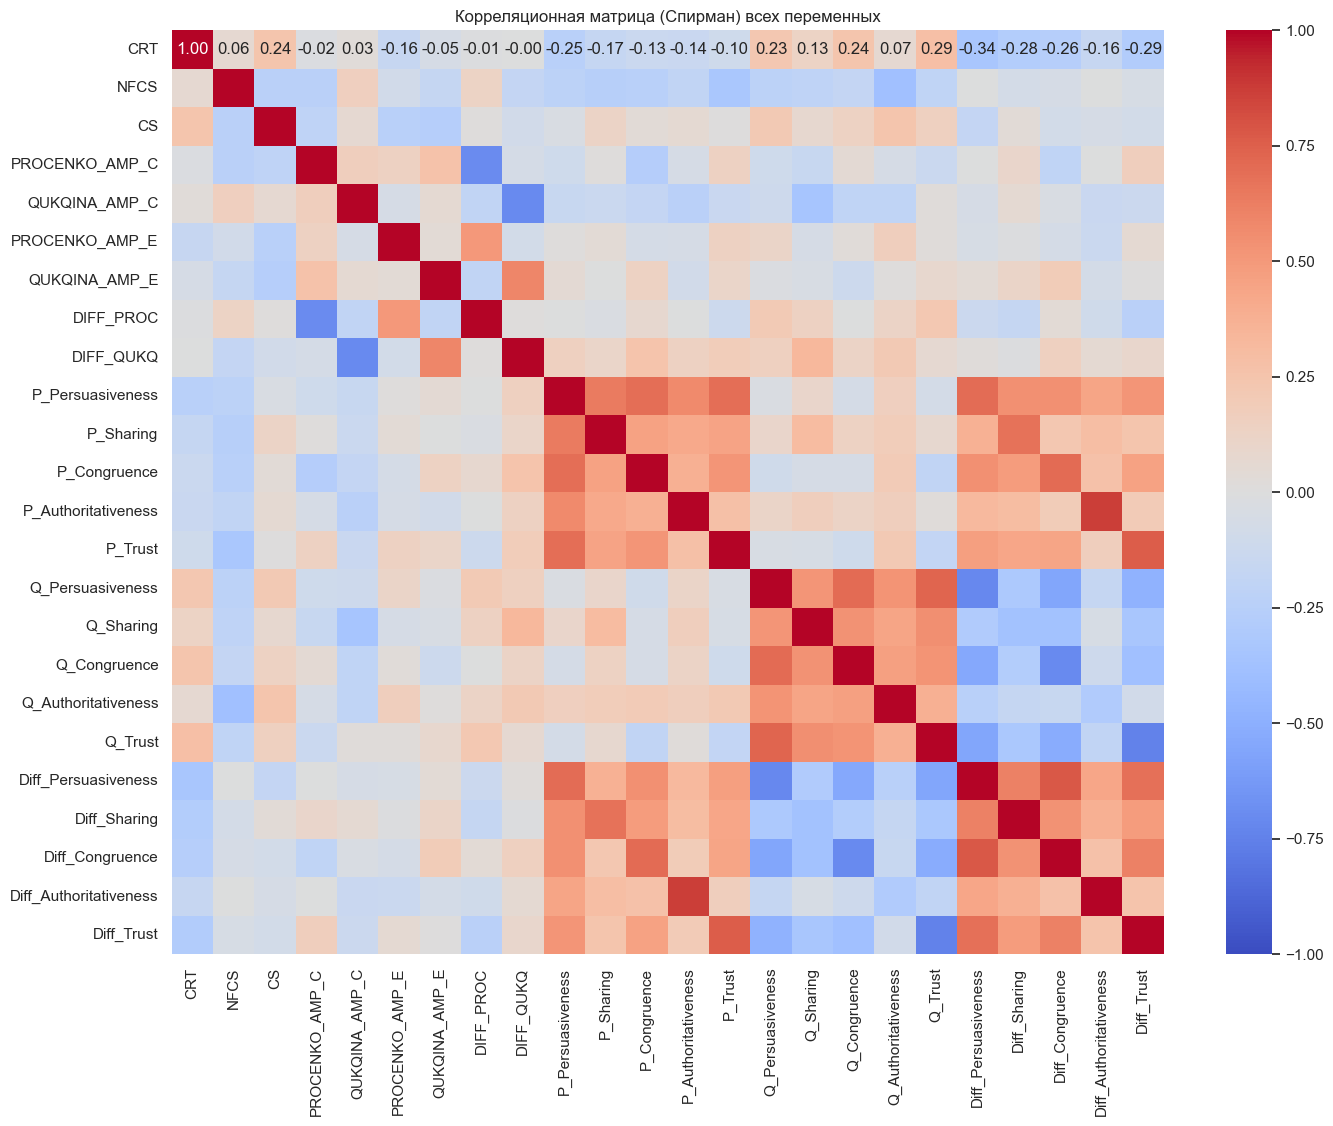

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных из файла
data = pd.read_csv('FINAL_1.csv')

# Выбор нужных переменных
variables = [
    'CRT', 'NFCS', 'CS', 'PROCENKO_AMP_C', 'QUKQINA_AMP_C', 
    'PROCENKO_AMP_E', 'QUKQINA_AMP_E', 'DIFF_PROC', 'DIFF_QUKQ',
    'P_Persuasiveness', 'P_Sharing', 'P_Congruence', 'P_Authoritativeness', 
    'P_Trust', 'Q_Persuasiveness', 'Q_Sharing', 'Q_Congruence', 
    'Q_Authoritativeness', 'Q_Trust', 'Diff_Persuasiveness', 
    'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 
    'Diff_Trust'
]

for var in ['PROCENKO_AMP_C', 'QUKQINA_AMP_C', 'PROCENKO_AMP_E', 'QUKQINA_AMP_E', 'DIFF_PROC', 'DIFF_QUKQ']:
    data[var] = data[var].str.replace(',', '.').astype(float)

# Создание DataFrame только с нужными переменными
df = data[variables]

# Расчет корреляционной матрицы Спирмена
corr_matrix = df.corr(method='spearman')

# Настройка размера графика
plt.figure(figsize=(16, 12))

# Создание тепловой карты с численными значениями корреляции
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1, fmt='.2f')

# Настройка заголовка и отображение графика
plt.title('Корреляционная матрица (Спирман) всех переменных')
plt.show()

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.styles import PatternFill

# Загрузка данных из файла
data = pd.read_csv('FINAL_1.csv')

# Выбор нужных переменных
variables = [
    'CRT', 'NFCS', 'CS', 'PROCENKO_AMP_C', 'QUKQINA_AMP_C', 
    'PROCENKO_AMP_E', 'QUKQINA_AMP_E', 'DIFF_PROC', 'DIFF_QUKQ',
    'P_Persuasiveness', 'P_Sharing', 'P_Congruence', 'P_Authoritativeness', 
    'P_Trust', 'Q_Persuasiveness', 'Q_Sharing', 'Q_Congruence', 
    'Q_Authoritativeness', 'Q_Trust', 'Diff_Persuasiveness', 
    'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 
    'Diff_Trust'
]

for var in ['PROCENKO_AMP_C', 'QUKQINA_AMP_C', 'PROCENKO_AMP_E', 'QUKQINA_AMP_E', 'DIFF_PROC', 'DIFF_QUKQ']:
    data[var] = data[var].str.replace(',', '.').astype(float)

# Создание DataFrame только с нужными переменными
df = data[variables]

# Проверка на пропущенные значения и заполнение их средним значением столбца
df = df.fillna(df.mean())

# Преобразование всех столбцов к числовому типу (если необходимо)
df = df.apply(pd.to_numeric, errors='coerce')

# Повторное заполнение пропущенных значений средним значением столбца (если необходимо)
df = df.fillna(df.mean())

# Расчет корреляционной матрицы Спирмена
corr_matrix = df.corr(method='spearman')

# Сохранение корреляционной матрицы в Excel с цветовой заливкой
wb = Workbook()
ws = wb.active

# Запись заголовков столбцов и строк
for i, col in enumerate(corr_matrix.columns, 1):
    ws.cell(row=1, column=i+1, value=col)
    ws.cell(row=i+1, column=1, value=col)

# Заполнение значений корреляционной матрицы и применение цветовой заливки
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        cell_value = corr_matrix.iloc[i, j]
        cell = ws.cell(row=i+2, column=j+2, value=cell_value)
        
        # Применение цветовой заливки на основе значения корреляции
        if cell_value > 0:
            fill_color = f'FF{int((1 - cell_value) * 255):02X}FF{int((1 - cell_value) * 255):02X}'
        else:
            fill_color = f'FF{int((1 + cell_value) * 255):02X}FFFF'
        
        cell.fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type='solid')

# Сохранение файла
wb.save('correlation_matrix.xlsx')

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from scipy.stats import spearmanr

# Загрузка данных из файла
data = pd.read_csv('FINAL_2.csv')

# Выбор нужных переменных
variables = [
    'CRT', 'NFCS', 'CS', 'AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust', 'Factor_1', 'Factor_2']

for var in ['AMP_C', 'AMP_E', 'AMP_DIFF']:
    data[var] = data[var].str.replace(',', '.').astype(float)
    
# Создание DataFrame только с нужными переменными
df = data[variables]

# Проверка на пропущенные значения и заполнение их средним значением столбца
df = df.fillna(df.mean())

# Преобразование всех столбцов к числовому типу (если необходимо)
df = df.apply(pd.to_numeric, errors='coerce')

# Повторное заполнение пропущенных значений средним значением столбца (если необходимо)
df = df.fillna(df.mean())

# Расчет корреляционной матрицы Спирмена и p-values
corr_matrix = pd.DataFrame(index=variables, columns=variables)
p_value_matrix = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
    for var2 in variables:
        corr, p_value = spearmanr(df[var1], df[var2])
        corr_matrix.loc[var1, var2] = corr
        p_value_matrix.loc[var1, var2] = p_value

# Сохранение корреляционной матрицы в Excel с цветовой заливкой
wb = Workbook()
ws = wb.active

# Запись заголовков столбцов и строк
for i, col in enumerate(corr_matrix.columns, 1):
    ws.cell(row=1, column=i+1, value=col)
    ws.cell(row=i+1, column=1, value=col)

# Заполнение значений корреляционной матрицы и применение цветовой заливки на основе p-value
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        p_value = p_value_matrix.iloc[i, j]
        cell = ws.cell(row=i+2, column=j+2, value=corr_value)
        
        # Применение цветовой заливки на основе значения корреляции и p-value
        if p_value < 0.05:  # Значимость на уровне 5%
            if corr_value > 0:
                fill_color = f'FF{int((1 - corr_value) * 255):02X}FF{int((1 - corr_value) * 255):02X}'
            else:
                fill_color = f'FF{int((1 + corr_value) * 255):02X}FFFF'
        else:
            fill_color = "FFFFFF"  # Белый цвет для незначимых корреляций
        
        cell.fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type='solid')

# Сохранение файла
wb.save('correlation.xlsx')

In [15]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

def robust_regression(data_path):
    # Загрузка данных
    df = pd.read_csv(data_path)

    # Преобразование номинальных переменных в числовые
    df['Attitude'] = LabelEncoder().fit_transform(df['Attitude'])
    df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
    df['Speaker'] = LabelEncoder().fit_transform(df['Speaker'])

    # Определение предикторов и зависимых переменных
    predictors = ['CRT', 'NFCS', 'CS']
    targets = ['Diff_Trust']
# Замена запятых на точки в указанных столбцах
        columns_to_replace = ['AMP_C', 'AMP_E', 'AMP_DIFF']
        for col in columns_to_replace:
            # Преобразуем данные в строковый формат, заменяем запятые на точки и преобразуем обратно в float
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

    for target in targets:
        X = df[predictors]
        y = df[target]
        
        # Добавление константы (intercept) для модели
        X = sm.add_constant(X)
        
        # Моделирование робастной регрессии
        model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
        results[target] = model.fit()
    
    return results

def interpret_model_to_csv(results, output_path):
    # Список для хранения строк данных
    rows = []

    for target, result in results.items():
        # Получение коэффициентов модели
        coefficients = result.params
        p_values = result.pvalues
        conf_intervals = result.conf_int()

        for param in coefficients.index:
            coef = coefficients[param]
            p_val = p_values[param]
            conf_int = conf_intervals.loc[param]

            # Запись данных в строку
            row = {
                'Target Variable': target,
                'Predictor': param,
                'Coefficient': coef,
                'P-Value': p_val,
                '95% CI Lower': conf_int[0],
                '95% CI Upper': conf_int[1],
                'Significance': 'Significant' if p_val < 0.05 else 'Not Significant'
            }
            rows.append(row)

    # Создание DataFrame и сохранение в CSV
    df_interpretation = pd.DataFrame(rows)
    df_interpretation.to_csv(output_path, index=False)

# Пример вызова функций
data_path = 'FINAL_2.csv'

output_path = 'interpretationss.csv'

results = robust_regression(data_path)
interpret_model_to_csv(results, output_path)


IndentationError: unexpected indent (4047045611.py, line 18)

In [17]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

def robust_regression(data_path):
    try:
        # Загрузка данных
        df = pd.read_csv(data_path)
        
        # Проверка наличия необходимых столбцов
        required_columns = ['CRT', 'NFCS', 'CS', 'AMP_C', 'AMP_E', 'AMP_DIFF'] + targets
        for col in required_columns:
            if col not in df.columns:
                raise ValueError(f"Column '{col}' is missing in the data.")
        
        # Замена запятых на точки в указанных столбцах
        columns_to_replace = ['AMP_C', 'AMP_E', 'AMP_DIFF']
        for col in columns_to_replace:
            # Преобразуем данные в строковый формат, заменяем запятые на точки и преобразуем обратно в float
            df[col] = df[col].astype(str).str.replace(',', '.').astype(float)
        
        # Преобразование номинальных переменных в числовые
        df['Attitude'] = LabelEncoder().fit_transform(df['Attitude'])
        df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
        df['Speaker'] = LabelEncoder().fit_transform(df['Speaker'])
        # Инициализация словаря для хранения результатов
        results = {}
        
        # Определение предикторов и зависимых переменных
        predictors = ['CS']
        
        for target in targets:
            X = df[predictors]
            y = df[target]
            # Добавление константы (intercept) для модели
            X = sm.add_constant(X)
            # Моделирование робастной регрессии
            model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
            results[target] = model.fit()
        
        return results
    
    except FileNotFoundError:
        print(f"File '{data_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

def interpret_model_to_csv(results, output_path):
    if not results:
        print("No results to interpret.")
        return

    # Список для хранения строк данных
    rows = []

    for target, result in results.items():
        # Получение коэффициентов модели
        coefficients = result.params
        p_values = result.pvalues
        conf_intervals = result.conf_int()

        for param in coefficients.index:
            coef = coefficients[param]
            p_val = p_values[param]
            conf_int = conf_intervals.loc[param]

            # Запись данных в строку
            row = {
                'Target Variable': target,
                'Predictor': param,
                'Coefficient': coef,
                'P-Value': p_val,
                '95% CI Lower': conf_int[0],
                '95% CI Upper': conf_int[1],
                'Significance': 'Significant' if p_val < 0.05 else 'Not Significant'
            }
            rows.append(row)

    # Создание DataFrame и сохранение в CSV
    df_interpretation = pd.DataFrame(rows)
    df_interpretation.to_csv(output_path, index=False)

# Пример вызова функций
data_path = '0.csv'
output_path = 'interpretation_7_.csv'

targets = ['Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust']

results = robust_regression(data_path)
interpret_model_to_csv(results, output_path)

In [153]:
import pandas as pd
import numpy as np
from scipy.stats import levene, kruskal
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Загрузка данных
data = pd.read_csv('FINAL_2.csv')

# Заменяем запятые на точки в указанных переменных
variables_to_replace = ['AMP_C', 'AMP_E', 'AMP_DIFF']
for var in variables_to_replace:
    data[var] = data[var].astype(str).str.replace(',', '.', regex=False).astype(float)

# Список переменных для анализа
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 
             'Sharing', 'Congruence', 'Authoritativeness', 
             'Trust', 'Factor_1', 'Factor_2']

# Проверка гомогенности дисперсий
def check_homogeneity(data, variable):
    group1 = data[data['Attitude'] == 'pro'][variable]
    group2 = data[data['Attitude'] == 'anti'][variable]
    group3 = data[data['Speaker'] == 'PROC'][variable]
    group4 = data[data['Speaker'] == 'SHUC'][variable]
    
    # Levene's test for homogeneity of variances
    stat, p_value = levene(group1.dropna(), group2.dropna(), group3.dropna(), group4.dropna())
    return p_value

# Запуск дисперсионного анализа
def perform_kruskal_test(data, variable):
    group1 = data[data['Attitude'] == 'pro'][variable]
    group2 = data[data['Attitude'] == 'anti'][variable]
    group3 = data[data['Speaker'] == 'PROC'][variable]
    group4 = data[data['Speaker'] == 'SHUC'][variable]
    
    # Kruskal-Wallis test
    stat, p_value = kruskal(group1.dropna(), group2.dropna(), group3.dropna(), group4.dropna())
    return stat, p_value

results = []

for var in variables:
    print(f"Analyzing variable: {var}")
    
    # Проверка на гомогенность дисперсий
    p_value_homogeneity = check_homogeneity(data, var)
    
    if p_value_homogeneity < 0.05:
        print(f"Гомогенность дисперсий нарушена для {var} (p-value: {p_value_homogeneity})")
        # Выполнение непараметрического теста (Kruskal-Wallis)
        stat, p_value = perform_kruskal_test(data, var)
        results.append({'Variable': var, 'Test': 'Kruskal-Wallis', 
                        'Statistic': stat, 'p-value': p_value, 
                        'Interpretation': "Различия между группами могут быть значительными."})
    else:
        print(f"Гомогенность дисперсий соблюдена для {var} (p-value: {p_value_homogeneity})")
        # Выполнение ANOVA (если бы данные были нормальными)
        model = ols(f'{var} ~ C(Attitude) + C(Speaker)', data=data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        results.append({'Variable': var, 'Test': 'ANOVA', 
                        'ANOVA Table': anova_table.to_dict(), 
                        'Interpretation': "Проверьте таблицу ANOVA для различий между группами."})

# Создание DataFrame для результатов
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel-файл
results_df.to_excel('analysis_results.xlsx', index=False)

print("Результаты сохранены в файл analysis_results.xlsx.")

Analyzing variable: AMP_C
Гомогенность дисперсий соблюдена для AMP_C (p-value: 0.5609806589020231)
Analyzing variable: AMP_E
Гомогенность дисперсий соблюдена для AMP_E (p-value: 0.062481948776297376)
Analyzing variable: AMP_DIFF
Гомогенность дисперсий соблюдена для AMP_DIFF (p-value: 0.22636817411584842)
Analyzing variable: Persuasiveness
Гомогенность дисперсий нарушена для Persuasiveness (p-value: 0.017918934701284937)
Analyzing variable: Sharing
Гомогенность дисперсий нарушена для Sharing (p-value: 0.011009393583942555)
Analyzing variable: Congruence
Гомогенность дисперсий соблюдена для Congruence (p-value: 0.6997217179823589)
Analyzing variable: Authoritativeness
Гомогенность дисперсий нарушена для Authoritativeness (p-value: 1.81220002419073e-06)
Analyzing variable: Trust
Гомогенность дисперсий соблюдена для Trust (p-value: 0.7365916954015472)
Analyzing variable: Factor_1
Гомогенность дисперсий соблюдена для Factor_1 (p-value: 0.06324843101477318)
Analyzing variable: Factor_2
Гомог

In [157]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import openpyxl

# Загрузка данных
data = pd.read_csv('FINAL_2.csv')

# Заменяем запятые на точки в указанных переменных
variables_to_replace = ['AMP_C', 'AMP_E', 'AMP_DIFF']
for var in variables_to_replace:
    data[var] = data[var].astype(str).str.replace(',', '.', regex=False).astype(float)
# Факторы
data['Attitude'] = data['Attitude'].astype('category')
data['Speaker'] = data['Speaker'].astype('category')

# Переменные для анализа
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 'Sharing', 
             'Congruence', 'Authoritativeness', 'Trust', 'Factor_1', 'Factor_2']

results = []

for var in variables:
    # Подготовка данных для ANOVA
    model = ols(f'{var} ~ C(Attitude) + C(Speaker)', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Проверка гомоскедастичности
    groups = [group[var].values for name, group in data.groupby(['Attitude', 'Speaker'])]
    levene_test = stats.levene(*groups)

    # Запись результатов
    result = {
        'Variable': var,
        'ANOVA F-value': anova_table['F'][0],
        'ANOVA p-value': anova_table['PR(>F)'][0],
        'Levene Statistic': levene_test.statistic,
        'Levene p-value': levene_test.pvalue,
        'H0 Levene': levene_test.pvalue > 0.05  # Гипотеза о гомоскедастичности
    }
    
    # Если p-value Левена < 0.05, используем непараметрический тест
    if levene_test.pvalue < 0.05:
        kruskal_test = stats.kruskal(*groups)
        result['Kruskal H-statistic'] = kruskal_test.statistic
        result['Kruskal p-value'] = kruskal_test.pvalue
    else:
        result['Kruskal H-statistic'] = None
        result['Kruskal p-value'] = None

    results.append(result)

# Создание DataFrame для результатов
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel
results_df.to_excel('ANOVA_Results.xlsx', index=False)

/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_32519/2021146222.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[var].values for name, group in data.groupby(['Attitude', 'Speaker'])]
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_32519/2021146222.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'ANOVA F-value': anova_table['F'][0],
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_32519/2021146222.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

In [163]:
import pandas as pd
from scipy.stats import kruskal
import xlsxwriter

# Загрузка данных из CSV файла
data = pd.read_csv('FINAL_2.csv')

# Переменные для тестирования
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 'Congruence', 'Trust', 'Factor_1', 'Factor_2']

# Создание Excel файла для записи результатов
workbook = xlsxwriter.Workbook('Kruskal_Wallis_Results.xlsx')
worksheet = workbook.add_worksheet()

# Запись заголовков в Excel
worksheet.write(0, 0, 'Variable')
worksheet.write(0, 1, 'H-statistic')
worksheet.write(0, 2, 'p-value')
worksheet.write(0, 3, 'Interpretation')

row = 1

# Выполнение теста Краскала-Уоллиса для каждой переменной
for var in variables:
    # Группировка данных по факторам
    groups = [group[var].values for name, group in data.groupby(['Attitude', 'Speaker'])]

    # Выполнение теста
    h_statistic, p_value = kruskal(*groups)

    # Интерпретация результатов
    if p_value < 0.05:
        interpretation = "Отвергаем нулевую гипотезу (различия значимы)"
    else:
        interpretation = "Не отвергаем нулевую гипотезу (различия незначимы)"

    # Запись результатов в Excel
    worksheet.write(row, 0, var)
    worksheet.write(row, 1, h_statistic)
    worksheet.write(row, 2, p_value)
    worksheet.write(row, 3, interpretation)

    row += 1

# Закрытие Excel файла
workbook.close()

In [161]:
pip install pandas scipy xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [95]:
import pandas as pd
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

# Загрузка данных из файла final_10.csv
df = pd.read_csv('FINAL_1.csv')

# Выбор переменных для анализа
variables = ['Diff_Persuasiveness', 'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 'Diff_Trust']
data = df[variables]

# Проверка на наличие пропущенных значений
if data.isnull().sum().sum() > 0:
    print("Данные содержат пропущенные значения. Заполните или удалите их перед анализом.")
else:
    # Эксплораторный факторный анализ (EFA)
    fa = FactorAnalyzer(n_factors=2, rotation='varimax')
    fa.fit(data)
    
    # Получение факторных нагрузок
    loadings = fa.loadings_
    print("Факторные нагрузки:\n", loadings)

    # Метод главных компонент (PCA)
    pca = PCA(n_components=2)
    factors = pca.fit_transform(data)
    
    # Добавление значений факторов в исходный DataFrame
    df['Factor_1'] = factors[:, 0]
    df['Factor_2'] = factors[:, 1]
    
    # Сохранение обновленного DataFrame в новый CSV файл
    df.to_csv('FINAL_1111111.csv', index=False)
    print("Анализ завершен. Результаты сохранены в FINAL_1111111.csv")

Факторные нагрузки:
 [[0.90177584 0.2857736 ]
 [0.60894654 0.25031545]
 [0.81200929 0.11756252]
 [0.18998193 0.92727233]
 [0.72234189 0.07678194]]
Анализ завершен. Результаты сохранены в final_10_with_factors.csv


Факторные нагрузки:
 [[0.90177584 0.2857736 ]
 [0.60894654 0.25031545]
 [0.81200929 0.11756252]
 [0.18998193 0.92727233]
 [0.72234189 0.07678194]]


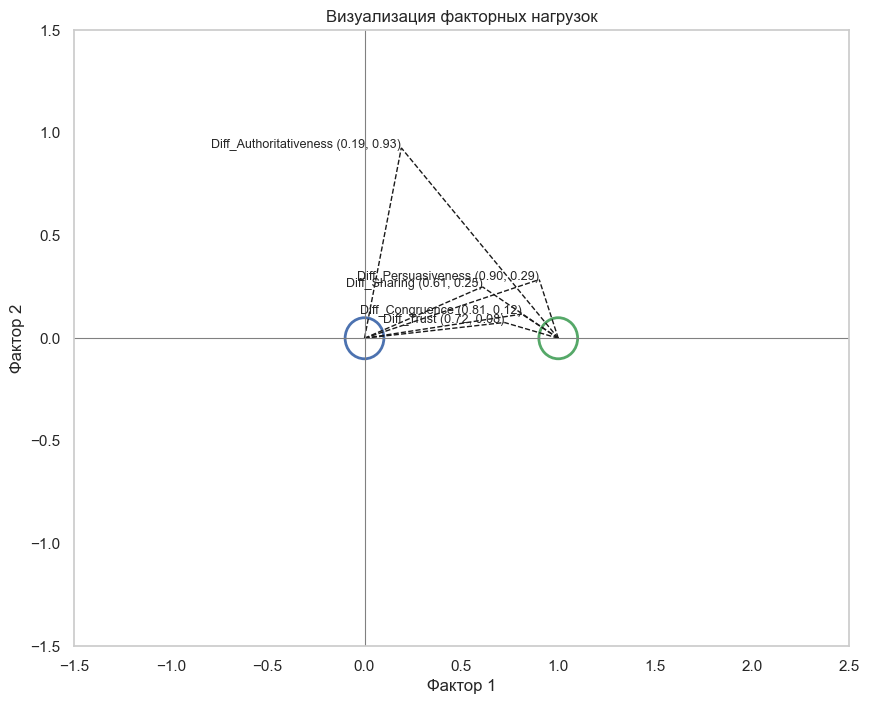

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# Загрузка данных из файла final_10.csv
df = pd.read_csv('FINAL_1.csv')

# Выбор переменных для анализа
variables = ['Diff_Persuasiveness', 'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 'Diff_Trust']
data = df[variables]

# Проверка на наличие пропущенных значений
if data.isnull().sum().sum() > 0:
    print("Данные содержат пропущенные значения. Заполните или удалите их перед анализом.")
else:
    # Эксплораторный факторный анализ (EFA)
    fa = FactorAnalyzer(n_factors=2, rotation='varimax')
    fa.fit(data)
    
    # Получение факторных нагрузок
    loadings = fa.loadings_
    print("Факторные нагрузки:\n", loadings)

    # Визуализация факторных нагрузок
    plt.figure(figsize=(10, 8))
    
    # Рисуем круги для факторов
    circle1 = plt.Circle((0, 0), 0.1, color='b', fill=False, linewidth=2)
    circle2 = plt.Circle((1, 0), 0.1, color='g', fill=False, linewidth=2)
    
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    # Соединяем переменные с факторами линиями и добавляем значения нагрузок
    for i, (x, y) in enumerate(loadings):
        plt.plot([0, x], [0, y], 'k--', linewidth=1)
        plt.plot([1, x], [0, y], 'k--', linewidth=1)
        plt.text(x, y, f'{variables[i]} ({x:.2f}, {y:.2f})', fontsize=9, ha='right')

    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 1.5)
    
    plt.title('Визуализация факторных нагрузок')
    plt.xlabel('Фактор 1')
    plt.ylabel('Фактор 2')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.grid(False)
    plt.show()

Факторные нагрузки:
 [[0.90177584 0.2857736 ]
 [0.60894654 0.25031545]
 [0.81200929 0.11756252]
 [0.18998193 0.92727233]
 [0.72234189 0.07678194]]


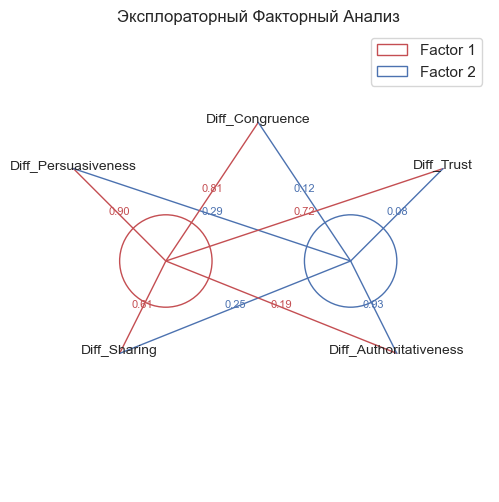

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# Загрузка данных из файла FINAL_1.csv
df = pd.read_csv('FINAL_1.csv')

# Выбор переменных для анализа
variables = ['Diff_Persuasiveness', 'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 'Diff_Trust']
data = df[variables]

# Проверка на наличие пропущенных значений
if data.isnull().sum().sum() > 0:
    print("Данные содержат пропущенные значения. Заполните или удалите их перед анализом.")
else:
    # Эксплораторный факторный анализ (EFA)
    fa = FactorAnalyzer(n_factors=2, rotation='varimax')
    fa.fit(data)
    
    # Получение факторных нагрузок
    loadings = fa.loadings_
    print("Факторные нагрузки:\n", loadings)

    # Визуализация факторного анализа
    fig, ax = plt.subplots(figsize=(8, 6))

    # Рисуем круги для факторов
    circle1 = plt.Circle((0.3, 0.5), 0.1, color='r', fill=False, label='Factor 1')
    circle2 = plt.Circle((0.7, 0.5), 0.1, color='b', fill=False, label='Factor 2')
    ax.add_patch(circle1)
    ax.add_patch(circle2)

    # Устанавливаем позиции для переменных вокруг факторов
    positions = [(0.1, 0.7), (0.2, 0.3), (0.5, 0.8), (0.8, 0.3), (0.9, 0.7)]

    for i, variable in enumerate(variables):
        # Соединяем переменные с факторами линиями и добавляем текст с факторными нагрузками
        ax.plot([0.3, positions[i][0]], [0.5, positions[i][1]], 'r-', lw=1)
        ax.plot([0.7, positions[i][0]], [0.5, positions[i][1]], 'b-', lw=1)
        
        ax.text(positions[i][0], positions[i][1], variable, fontsize=10, ha='center')
        
        # Добавление текстовых меток с факторными нагрузками
        ax.text((0.3 + positions[i][0]) / 2, (0.5 + positions[i][1]) / 2,
                f"{loadings[i, 0]:.2f}", fontsize=8, color='r', ha='center')
        ax.text((0.7 + positions[i][0]) / 2, (0.5 + positions[i][1]) / 2,
                f"{loadings[i, 1]:.2f}", fontsize=8, color='b', ha='center')

    # Настройка отображения
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    plt.axis('off')
    plt.legend()
    plt.title("Эксплораторный Факторный Анализ")
    plt.show()

Факторные нагрузки:
 [[0.90177584 0.2857736 ]
 [0.60894654 0.25031545]
 [0.81200929 0.11756252]
 [0.18998193 0.92727233]
 [0.72234189 0.07678194]]


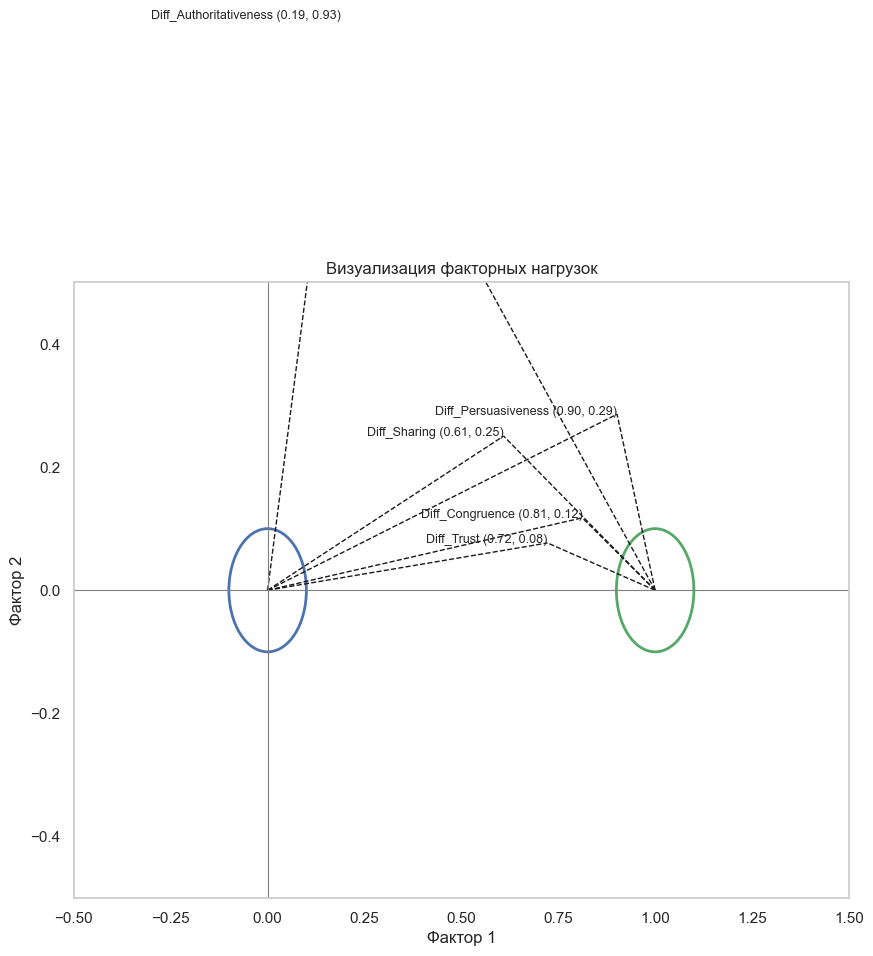

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

# Загрузка данных из файла final_10.csv
df = pd.read_csv('FINAL_1.csv')

# Выбор переменных для анализа
variables = ['Diff_Persuasiveness', 'Diff_Sharing', 'Diff_Congruence', 'Diff_Authoritativeness', 'Diff_Trust']
data = df[variables]

# Проверка на наличие пропущенных значений
if data.isnull().sum().sum() > 0:
    print("Данные содержат пропущенные значения. Заполните или удалите их перед анализом.")
else:
    # Эксплораторный факторный анализ (EFA)
    fa = FactorAnalyzer(n_factors=2, rotation='varimax')
    fa.fit(data)
    
    # Получение факторных нагрузок
    loadings = fa.loadings_
    print("Факторные нагрузки:\n", loadings)

    # Визуализация факторных нагрузок
    plt.figure(figsize=(10, 8))
    
    # Рисуем круги для факторов
    circle1 = plt.Circle((0, 0), 0.1, color='b', fill=False, linewidth=2)
    circle2 = plt.Circle((1, 0), 0.1, color='g', fill=False, linewidth=2)
    
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)

    # Соединяем переменные с факторами линиями и добавляем значения нагрузок
    for i, (x, y) in enumerate(loadings):
        plt.plot([0, x], [0, y], 'k--', linewidth=1)
        plt.plot([1, x], [0, y], 'k--', linewidth=1)
        plt.text(x, y, f'{variables[i]} ({x:.2f}, {y:.2f})', fontsize=9, ha='right')

    # Устанавливаем более узкие границы графика
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 0.5)
    
    plt.title('Визуализация факторных нагрузок')
    plt.xlabel('Фактор 1')
    plt.ylabel('Фактор 2')
    plt.axhline(0, color='grey', linewidth=0.8)
    plt.axvline(0, color='grey', linewidth=0.8)
    plt.grid(False)
    plt.show()

In [25]:
import pandas as pd
import statsmodels.api as sm

# Загрузка данных
data = pd.read_csv('FINAL_2.csv')

# Замена запятых на точки в нужных столбцах
data['AMP_C'] = data['AMP_C'].str.replace(',', '.').astype(float)
data['AMP_E'] = data['AMP_E'].str.replace(',', '.').astype(float)
data['AMP_DIFF'] = data['AMP_DIFF'].str.replace(',', '.').astype(float)

# Определение независимых переменных и зависимой переменной
independent_vars = ['CRT', 'NFCS', 'CS', 'AMP_C', 'AMP_E', 'AMP_DIFF']
dependent_var = 'Diff_Trust'

# Словарь для хранения результатов
results_dict = {}

# Выполнение робастной регрессии для каждой независимой переменной
for var in independent_vars:
    X = data[[var]]
    X = sm.add_constant(X)  # Добавление константы
    y = data[dependent_var]
    
    # Робастная регрессия (HuberRegressor)
    model = sm.RLM(y, X, M=sm.robust.norms.HuberT())
    result = model.fit()
    
    # Сохранение результатов в словарь
    results_dict[var] = result

    # Вывод интерпретации
    print(f'Результаты регрессии для {var}:')
    print(result.summary())
    print('\n')

# Сохранение результатов в новый CSV файл
summary_df = pd.DataFrame({
    'Variable': [],
    'Coefficient': [],
    'P-Value': []
})

for var, result in results_dict.items():
    summary_df = summary_df.append({
        'Variable': var,
        'Coefficient': result.params[1],  # Коэффициент для независимой переменной
        'P-Value': result.pvalues[1]       # P-значение для независимой переменной
    }, ignore_index=True)

summary_df.to_csv('robust_regression_results.csv', index=False)

print("Результаты сохранены в файл 'robust_regression_results.csv'")

Результаты регрессии для CRT:
                    Robust linear Model Regression Results                    
Dep. Variable:             Diff_Trust   No. Observations:                  124
Model:                            RLM   Df Residuals:                      122
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 21 Aug 2024                                         
Time:                        08:39:31                                         
No. Iterations:                    12                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9073 

AttributeError: 'DataFrame' object has no attribute 'append'

In [21]:
pip install pandas statsmodels numpy
  

SyntaxError: invalid syntax (2688425183.py, line 1)

In [33]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных
df = pd.read_csv('FINAL_2.csv')

# Замена запятых на точки в столбцах 'AMP_C', 'AMP_E', 'AMP_DIFF'
for col in ['AMP_C', 'AMP_E', 'AMP_DIFF']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Список переменных для анализа
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 'Sharing', 
             'Congruence', 'Authoritativeness', 'Trust', 'Factor_1', 
             'Factor_2', 'Diff_Trust']

# Результаты
results = []

# Проведение теста Манна-Уитни для каждой переменной
for var in variables:
    # Разделение данных по Attitude (pro и anti)
    group_pro = df[df['Attitude'] == 'pro'][var]
    group_anti = df[df['Attitude'] == 'anti'][var]
    
    # Тест Манна-Уитни
    stat, p_value = mannwhitneyu(group_pro, group_anti, alternative='two-sided')
    
    # Интерпретация результата
    interpretation = "Нет значимых различий" if p_value > 0.05 else "Значимые различия"
    
    # Сохранение результата
    results.append({
        'Variable': var,
        'Statistic': stat,
        'p-value': p_value,
        'Interpretation': interpretation
    })

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Сохранение результатов в новый CSV файл
results_df.to_csv('mann_whitney_results.csv', index=False)

print(results_df)

             Variable  Statistic   p-value         Interpretation
0               AMP_C     1821.0  0.843699  Нет значимых различий
1               AMP_E     1724.0  0.487736  Нет значимых различий
2            AMP_DIFF     1847.0  0.948959  Нет значимых различий
3      Persuasiveness     2039.0  0.352574  Нет значимых различий
4             Sharing     2012.5  0.426590  Нет значимых различий
5          Congruence     2020.0  0.406664  Нет значимых различий
6   Authoritativeness     1635.5  0.233194  Нет значимых различий
7               Trust     2062.0  0.296242  Нет значимых различий
8            Factor_1     1996.5  0.486081  Нет значимых различий
9            Factor_2     1512.5  0.075529  Нет значимых различий
10         Diff_Trust     1316.0  0.005075      Значимые различия


In [35]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных
df = pd.read_csv('FINAL_2.csv')

# Замена запятых на точки в столбцах 'AMP_C', 'AMP_E', 'AMP_DIFF'
for col in ['AMP_C', 'AMP_E', 'AMP_DIFF']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Список переменных для анализа
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 'Sharing', 
             'Congruence', 'Authoritativeness', 'Trust', 'Factor_1', 
             'Factor_2', 'Diff_Trust']

# Результаты
results = []

# Проведение теста Манна-Уитни для каждой переменной
for var in variables:
    # Разделение данных по Speaker (PROC и SHUC)
    group_proc = df[df['Speaker'] == 'PROC'][var]
    group_shuc = df[df['Speaker'] == 'SHUC'][var]
    
    # Тест Манна-Уитни
    stat, p_value = mannwhitneyu(group_proc, group_shuc, alternative='two-sided')
    
    # Интерпретация результата
    interpretation = "Нет значимых различий" if p_value > 0.05 else "Значимые различия"
    
    # Сохранение результата
    results.append({
        'Variable': var,
        'Statistic': stat,
        'p-value': p_value,
        'Interpretation': interpretation
    })

# Создание DataFrame с результатами
results_df = pd.DataFrame(results)

# Сохранение результатов в новый CSV файл
results_df.to_csv('mann_whitney_results_by_speaker.csv', index=False)

print(results_df)

             Variable  Statistic       p-value         Interpretation
0               AMP_C     1479.0  2.716510e-02      Значимые различия
1               AMP_E     1201.0  3.199415e-04      Значимые различия
2            AMP_DIFF     1739.0  3.630099e-01  Нет значимых различий
3      Persuasiveness     2977.0  8.327909e-08      Значимые различия
4             Sharing     2914.0  4.143852e-07      Значимые различия
5          Congruence     2772.0  1.595196e-05      Значимые различия
6   Authoritativeness     3195.0  4.068245e-11      Значимые различия
7               Trust     2493.0  3.863563e-03      Значимые различия
8            Factor_1     3048.5  1.792494e-08      Значимые различия
9            Factor_2     2584.5  9.277350e-04      Значимые различия
10         Diff_Trust     1949.5  8.899560e-01  Нет значимых различий


In [41]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Предположим, у вас есть DataFrame с данными
# Например:
# data = pd.DataFrame({
#     'AMP_DIFF': [...],
#     'Attitude': [...],
#     'Speaker': [...]
# })

# Фильтрация данных для первой группы: Attitude-pro и Speaker-SHUC
group1 = data[(data['Attitude'] == 'pro') & (data['Speaker'] == 'SHUC')]['AMP_C']

# Фильтрация данных для второй группы: Attitude-anti и Speaker-PROC
group2 = data[(data['Attitude'] == 'anti') & (data['Speaker'] == 'PROC')]['AMP_C']

# Выполнение теста Манна-Уитни
stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

print(f"Статистика U-теста: {stat}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Есть статистически значимые различия между группами.")
else:
    print("Нет статистически значимых различий между группами.")

Статистика U-теста: 550.0
P-значение: 0.2228374730763003
Нет статистически значимых различий между группами.


In [43]:
import pandas as pd

# Загрузка данных из CSV файла
data = pd.read_csv('FINAL_2.csv')

# Замена запятых на точки в указанных столбцах
for column in ['AMP_C', 'AMP_E', 'AMP_DIFF']:
    data[column] = data[column].str.replace(',', '.').astype(float)

# Функция для классификации по конгруэнтности
def classify_congruence(row):
    if (row['Attitude'] == 'pro' and row['Speaker'] == 'PROC') or \
       (row['Attitude'] == 'anti' and row['Speaker'] == 'SHUC'):
        return 'Congruent'
    elif (row['Attitude'] == 'pro' and row['Speaker'] == 'SHUC') or \
         (row['Attitude'] == 'anti' and row['Speaker'] == 'PROC'):
        return 'Incongruent'
    else:
        return 'Undefined'

# Применение функции классификации к каждой строке
data['Congruence'] = data.apply(classify_congruence, axis=1)

# Интерпретация результатов
congruence_counts = data['Congruence'].value_counts()
print("Интерпретация результатов:")
print(congruence_counts)

# Сохранение результата в новый CSV файл
data.to_csv('FINAL_2_classified.csv', index=False)

Интерпретация результатов:
Congruence
Congruent      61
Incongruent    61
Undefined       2
Name: count, dtype: int64


In [45]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных из CSV файла
data = pd.read_csv('FINAL_2.csv')

# Замена запятых на точки в указанных столбцах и преобразование в числовой формат
for column in ['AMP_C', 'AMP_E', 'AMP_DIFF']:
    data[column] = data[column].str.replace(',', '.').astype(float)

# Функция для классификации по конгруэнтности
def classify_congruence(row):
    if (row['Attitude'] == 'pro' and row['Speaker'] == 'PROC') or \
       (row['Attitude'] == 'anti' and row['Speaker'] == 'SHUC'):
        return 'Congruent'
    elif (row['Attitude'] == 'pro' and row['Speaker'] == 'SHUC') or \
         (row['Attitude'] == 'anti' and row['Speaker'] == 'PROC'):
        return 'Incongruent'
    else:
        return 'Undefined'

# Применение функции классификации к каждой строке
data['Congruence'] = data.apply(classify_congruence, axis=1)

# Выполнение теста Манна-Уитни для каждой переменной
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Diff_Trust']
results = {}

for variable in variables:
    congruent_data = data[data['Congruence'] == 'Congruent'][variable]
    incongruent_data = data[data['Congruence'] == 'Incongruent'][variable]
    
    # Выполнение теста Манна-Уитни
    stat, p_value = mannwhitneyu(congruent_data, incongruent_data, alternative='two-sided')
    
    # Сохранение результатов
    results[variable] = {'U-Statistic': stat, 'p-value': p_value}

# Интерпретация результатов
print("Результаты теста Манна-Уитни:")
for variable, result in results.items():
    print(f"{variable}: U-Statistic = {result['U-Statistic']}, p-value = {result['p-value']}")

# Сохранение результата в новый CSV файл
data.to_csv('FINAL_2_with_congruence.csv', index=False)

Результаты теста Манна-Уитни:
AMP_C: U-Statistic = 1859.0, p-value = 0.99591448888865
AMP_E: U-Statistic = 1854.0, p-value = 0.9754906819362826
AMP_DIFF: U-Statistic = 1933.0, p-value = 0.7123718584808062
Diff_Trust: U-Statistic = 1860.5, p-value = 1.0


In [51]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных
df = pd.read_csv('FINAL_2.csv')

# Замена запятых на точки и преобразование в float
for col in ['AMP_C', 'AMP_E', 'AMP_DIFF']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Определение групп
pro_proc = df[(df['Attitude'] == 'pro') & (df['Speaker'] == 'PROC')]
pro_shuc = df[(df['Attitude'] == 'pro') & (df['Speaker'] == 'SHUC')]
anti_proc = df[(df['Attitude'] == 'anti') & (df['Speaker'] == 'PROC')]
anti_shuc = df[(df['Attitude'] == 'anti') & (df['Speaker'] == 'SHUC')]

# Переменные для анализа
variables = ['AMP_C', 'AMP_E', 'AMP_DIFF', 'Persuasiveness', 'Sharing', 
             'Congruence', 'Authoritativeness', 'Trust', 
             'Factor_1', 'Factor_2']

# Функция для выполнения теста Манна-Уитни и интерпретации результатов
def perform_mannwhitneyu_test(group1, group2, variable):
    stat, p_value = mannwhitneyu(group1[variable], group2[variable], alternative='two-sided')
    interpretation = "No significant difference" if p_value > 0.05 else "Significant difference"
    return stat, p_value, interpretation

results = []

# Выполнение тестов для каждой переменной
for variable in variables:
    stat, p_value, interpretation = perform_mannwhitneyu_test(pro_proc, pro_shuc, variable)
    results.append(['pro-Attitude + PROC-Speaker vs pro-Attitude + SHUC-Speaker', variable, stat, p_value, interpretation])
    
    stat, p_value, interpretation = perform_mannwhitneyu_test(anti_proc, anti_shuc, variable)
    results.append(['anti-Attitude + PROC-Speaker vs anti-Attitude + SHUC-Speaker', variable, stat, p_value, interpretation])

# Создание DataFrame с результатами
results_df = pd.DataFrame(results, columns=['Comparison', 'Variable', 'Statistic', 'P-value', 'Interpretation'])

# Сохранение результатов в CSV файл
results_df.to_csv('mannwhitneyu_results.csv', index=False)

print(results_df)

                                           Comparison           Variable  \
0   pro-Attitude + PROC-Speaker vs pro-Attitude + ...              AMP_C   
1   anti-Attitude + PROC-Speaker vs anti-Attitude ...              AMP_C   
2   pro-Attitude + PROC-Speaker vs pro-Attitude + ...              AMP_E   
3   anti-Attitude + PROC-Speaker vs anti-Attitude ...              AMP_E   
4   pro-Attitude + PROC-Speaker vs pro-Attitude + ...           AMP_DIFF   
5   anti-Attitude + PROC-Speaker vs anti-Attitude ...           AMP_DIFF   
6   pro-Attitude + PROC-Speaker vs pro-Attitude + ...     Persuasiveness   
7   anti-Attitude + PROC-Speaker vs anti-Attitude ...     Persuasiveness   
8   pro-Attitude + PROC-Speaker vs pro-Attitude + ...            Sharing   
9   anti-Attitude + PROC-Speaker vs anti-Attitude ...            Sharing   
10  pro-Attitude + PROC-Speaker vs pro-Attitude + ...         Congruence   
11  anti-Attitude + PROC-Speaker vs anti-Attitude ...         Congruence   
12  pro-Atti

In [119]:
import pandas as pd
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_ind

# Загрузка данных из CSV файла
data = pd.read_csv('EEG.csv')

# Замена запятых на точки в переменных AMP_C_PROC и AMP_E_PROC
data['PROCENKO_AMP_C'] = data['PROCENKO_AMP_C'].str.replace(',', '.').astype(float)
data['PROCENKO_AMP_E'] = data['PROCENKO_AMP_E'].str.replace(',', '.').astype(float)

data['QUKQINA_AMP_C'] = data['QUKQINA_AMP_C'].str.replace(',', '.').astype(float)
data['QUKQINA_AMP_E'] = data['QUKQINA_AMP_E'].str.replace(',', '.').astype(float)

data['60_65_PROCENKO_AMP_C'] = data['60_65_PROCENKO_AMP_C'].str.replace(',', '.').astype(float)
data['60_65_PROCENKO_AMP_E'] = data['60_65_PROCENKO_AMP_E'].str.replace(',', '.').astype(float)

data['60_65_QUKQINA_AMP_C'] = data['60_65_QUKQINA_AMP_C'].str.replace(',', '.').astype(float)
data['60_65_QUKQINA_AMP_E'] = data['60_65_QUKQINA_AMP_E'].str.replace(',', '.').astype(float)

data['50_75_PROCENKO_AMP_C'] = data['50_75_PROCENKO_AMP_C'].str.replace(',', '.').astype(float)
data['50_75_PROCENKO_AMP_E'] = data['50_75_PROCENKO_AMP_E'].str.replace(',', '.').astype(float)

data['50_75_QUKQINA_AMP_C'] = data['50_75_QUKQINA_AMP_C'].str.replace(',', '.').astype(float)
data['50_75_QUKQINA_AMP_E'] = data['50_75_QUKQINA_AMP_E'].str.replace(',', '.').astype(float)


print('------------------------------------------  OLD')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic1, p_value1 = mannwhitneyu(filtered_data['PROCENKO_AMP_C'], filtered_data['PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic1}")
print(f"P-значение: {p_value1}")

# Интерпретация результата
alpha = 0.05
if p_value1 < alpha:
    print("Существует статистически значимая разница между PROCENKO_AMP_C и PROCENKO_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между PROCENKO_AMP_C и PROCENKO_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic2, p_value2 = mannwhitneyu(filtered_data['PROCENKO_AMP_C'], filtered_data['PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic2}")
print(f"P-значение: {p_value2}")

# Интерпретация результата
alpha = 0.05
if p_value2 < alpha:
    print("Существует статистически значимая разница между PROCENKO_AMP_C и PROCENKO_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между PROCENKO_AMP_C и PROCENKO_AMP_E для группы 'anti'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic3, p_value3 = mannwhitneyu(filtered_data['QUKQINA_AMP_C'], filtered_data['QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic3}")
print(f"P-значение: {p_value3}")

# Интерпретация результата
alpha = 0.05
if p_value3 < alpha:
    print("Существует статистически значимая разница между QUKQINA_AMP_C и QUKQINA_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между QUKQINA_AMP_C и QUKQINA_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic4, p_value4 = mannwhitneyu(filtered_data['QUKQINA_AMP_C'], filtered_data['QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic4}")
print(f"P-значение: {p_value4}")

# Интерпретация результата
alpha = 0.05
if p_value4 < alpha:
    print("Существует статистически значимая разница между QUKQINA_AMP_C и QUKQINA_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между QUKQINA_AMP_C и QUKQINA_AMP_E для группы 'anti'.")


print('------------------------------------------  600ms - 650ms')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic1, p_value1 = ttest_ind(filtered_data['60_65_PROCENKO_AMP_C'], filtered_data['60_65_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic1}")
print(f"P-значение: {p_value1}")

# Интерпретация результата
alpha = 0.05
if p_value1 < alpha:
    print("Существует статистически значимая разница между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic2, p_value2 = ttest_ind(filtered_data['60_65_PROCENKO_AMP_C'], filtered_data['60_65_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic2}")
print(f"P-значение: {p_value2}")

# Интерпретация результата
alpha = 0.05
if p_value2 < alpha:
    print("Существует статистически значимая разница между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'anti'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic3, p_value3 = ttest_ind(filtered_data['60_65_QUKQINA_AMP_C'], filtered_data['60_65_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic3}")
print(f"P-значение: {p_value3}")

# Интерпретация результата
alpha = 0.05
if p_value3 < alpha:
    print("Существует статистически значимая разница между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic4, p_value4 = ttest_ind(filtered_data['60_65_QUKQINA_AMP_C'], filtered_data['60_65_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика T: {statistic4}")
print(f"P-значение: {p_value4}")

# Интерпретация результата
alpha = 0.05
if p_value4 < alpha:
    print("Существует статистически значимая разница между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'anti'.")

print('------------------------------------------ 500ms - 750ms')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic1, p_value1 = mannwhitneyu(filtered_data['50_75_PROCENKO_AMP_C'], filtered_data['50_75_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic1}")
print(f"P-значение: {p_value1}")

# Интерпретация результата
alpha = 0.05
if p_value1 < alpha:
    print("Существует статистически значимая разница между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic2, p_value2 = mannwhitneyu(filtered_data['50_75_PROCENKO_AMP_C'], filtered_data['50_75_PROCENKO_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic2}")
print(f"P-значение: {p_value2}")

# Интерпретация результата
alpha = 0.05
if p_value2 < alpha:
    print("Существует статистически значимая разница между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 50_75_PROCENKO_AMP_C и 50_75_PROCENKO_AMP_E для группы 'anti'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'pro']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic3, p_value3 = mannwhitneyu(filtered_data['50_75_QUKQINA_AMP_C'], filtered_data['50_75_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic3}")
print(f"P-значение: {p_value3}")

# Интерпретация результата
alpha = 0.05
if p_value3 < alpha:
    print("Существует статистически значимая разница между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'pro'.")
else:
    print("Нет статистически значимой разницы между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'pro'.")

print('----------------')

# Фильтрация данных по значению 'anti' в переменной Attitude
filtered_data = data[data['Attitude'] == 'anti']

# Проведение теста Манна-Уитни на отфильтрованных данных
statistic4, p_value4 = mannwhitneyu(filtered_data['50_75_QUKQINA_AMP_C'], filtered_data['50_75_QUKQINA_AMP_E'])

# Вывод результатов
print(f"Статистика U: {statistic4}")
print(f"P-значение: {p_value4}")

# Интерпретация результата
alpha = 0.05
if p_value4 < alpha:
    print("Существует статистически значимая разница между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'anti'.")
else:
    print("Нет статистически значимой разницы между 50_75_QUKQINA_AMP_C и 50_75_QUKQINA_AMP_E для группы 'anti'.")



------------------------------------------  OLD
Статистика U: 626.0
P-значение: 0.041211763121747326
Существует статистически значимая разница между PROCENKO_AMP_C и PROCENKO_AMP_E для группы 'pro'.
----------------
Статистика U: 572.0
P-значение: 0.20014091620698737
Нет статистически значимой разницы между PROCENKO_AMP_C и PROCENKO_AMP_E для группы 'anti'.
----------------
Статистика U: 559.0
P-значение: 0.27214827812938513
Нет статистически значимой разницы между QUKQINA_AMP_C и QUKQINA_AMP_E для группы 'pro'.
----------------
Статистика U: 519.0
P-значение: 0.5926596796758019
Нет статистически значимой разницы между QUKQINA_AMP_C и QUKQINA_AMP_E для группы 'anti'.
------------------------------------------  600ms - 650ms
Статистика T: 1.643606704618332
P-значение: 0.10548804959230668
Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.
----------------
Статистика T: 2.6421831321458615
P-значение: 0.010490263098467612
Существует стати

In [73]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Загрузка данных из CSV файла
data = pd.read_csv('EEG_DATA_NEW_C_1.csv')

# Замена запятых на точки в переменных AMP_C_PROC и AMP_E_PROC
data['AMP_C_PROC'] = data['AMP_C_PROC'].str.replace(',', '.').astype(float)
data['AMP_E_PROC'] = data['AMP_E_PROC'].str.replace(',', '.').astype(float)
data['AMP_C_SHUC'] = data['AMP_C_SHUC'].str.replace(',', '.').astype(float)
data['AMP_E_SHUC'] = data['AMP_E_SHUC'].str.replace(',', '.').astype(float)

# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(data['AMP_C_SHUC'], data['AMP_E_SHUC'])

# Вывод результатов
print(f"Статистика U: {statistic}")
print(f"P-значение: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Существует статистически значимая разница между AMP_C_SHUC и AMP_E_SHUC.")
else:
    print("Нет статистически значимой разницы между AMP_C_SHUC и AMP_E_SHUC.")

Статистика U: 2112.0
P-значение: 0.3436352651716459
Нет статистически значимой разницы между AMP_C_SHUC и AMP_E_SHUC.


In [107]:
Статистика Т: 1.9621132533587462
P-значение: 0.05908447900726199
Нет статистически значимой разницы между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'pro'.
----------------
Статистика Т: 2.9897716215127974
P-значение: 0.005530345709161416
Существует статистически значимая разница между 60_65_PROCENKO_AMP_C и 60_65_PROCENKO_AMP_E для группы 'anti'.
----------------
Статистика Т: 0.8551353539720402
P-значение: 0.399254276613244
Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'pro'.
----------------
Статистика Т: 0.23535620052957568
P-значение: 0.8155315028905132
Нет статистически значимой разницы между 60_65_QUKQINA_AMP_C и 60_65_QUKQINA_AMP_E для группы 'anti'.
---------------- 500ms - 750ms 


SyntaxError: unterminated string literal (detected at line 1) (401683490.py, line 1)

In [187]:
import pandas as pd
from scipy.stats import shapiro
from openpyxl import load_workbook
from openpyxl.styles import PatternFill

# Загрузка данных из файла CSV
data = pd.read_csv('EEG_001.csv')

# Замена запятых на точки в указанных переменных
variables = [
    '60_65_diff_AMP', '50_75_diff_AMP', 'diff_amp'
]

# Замена запятых на точки в данных
for var in variables:
    data[var] = data[var].astype(str).str.replace(',', '.').astype(float)

# Создание DataFrame для сохранения результатов
results = []

# Функция для проверки нормальности распределения
def check_normality(group_data, variable, group_name):
    stat, p_value = shapiro(group_data)
    is_normal = p_value > 0.05
    results.append({
        'Variable': variable,
        'Group': group_name,
        'Statistic': stat,
        'p-value': p_value,
        'Normal Distribution': is_normal
    })

# Разделение данных по группам anti и pro
anti_group = data[data['Attitude'] == 'anti']
pro_group = data[data['Attitude'] == 'pro']

# Проверка нормальности для каждой переменной в каждой группе
for variable in variables:
    check_normality(anti_group[variable], variable, 'anti')
    check_normality(pro_group[variable], variable, 'pro')

# Создание DataFrame из результатов
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel-файл
results_df.to_excel('normality_results.xlsx', index=False)

# Открытие Excel-файла для форматирования
wb = load_workbook('normality_results.xlsx')
ws = wb.active

# Форматирование строк на основе нормальности распределения
for row in range(2, ws.max_row + 1):
    is_normal = ws.cell(row=row, column=5).value
    fill_color = "00FF00" if is_normal else "FF0000"  # Зеленый для нормального, красный для ненормального
    for col in range(1, ws.max_column + 1):
        ws.cell(row=row, column=col).fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type="solid")

# Сохранение отформатированного Excel-файла
wb.save('normality_results.xlsx')

In [121]:
import pandas as pd

# Данные в виде списка словарей
data = [
    {"Interval": "OLD", "Statistic": "U", "Value": 626.0, "P-value": 0.041211763121747326, 
     "Comparison": "PROCENKO_AMP_C vs PROCENKO_AMP_E", "Group": "pro", "Significant": True},
    {"Interval": "OLD", "Statistic": "U", "Value": 572.0, "P-value": 0.20014091620698737, 
     "Comparison": "PROCENKO_AMP_C vs PROCENKO_AMP_E", "Group": "anti", "Significant": False},
    {"Interval": "OLD", "Statistic": "U", "Value": 559.0, "P-value": 0.27214827812938513, 
     "Comparison": "QUKQINA_AMP_C vs QUKQINA_AMP_E", "Group": "pro", "Significant": False},
    {"Interval": "OLD", "Statistic": "U", "Value": 519.0, "P-value": 0.5926596796758019, 
     "Comparison": "QUKQINA_AMP_C vs QUKQINA_AMP_E", "Group": "anti", "Significant": False},
    
    {"Interval": "600ms - 650ms", "Statistic": "T", "Value": 1.643606704618332, "P-value": 0.10548804959230668, 
     "Comparison": "60_65_PROCENKO_AMP_C vs 60_65_PROCENKO_AMP_E", "Group": "pro", "Significant": False},
    {"Interval": "600ms - 650ms", "Statistic": "T", "Value": 2.6421831321458615, "P-value": 0.010490263098467612, 
     "Comparison": "60_65_PROCENKO_AMP_C vs 60_65_PROCENKO_AMP_E", "Group": "anti", "Significant": True},
    {"Interval": "600ms - 650ms", "Statistic": "T", "Value": 0.8434947991573997, "P-value": 0.40230209280724727, 
     "Comparison": "60_65_QUKQINA_AMP_C vs 60_65_QUKQINA_AMP_E", "Group": "pro", "Significant": False},
    {"Interval": "600ms - 650ms", "Statistic": "T", "Value": 0.2650851851821874, "P-value": 0.7918524467131027, 
     "Comparison": "60_65_QUKQINA_AMP_C vs 60_65_QUKQINA_AMP_E", "Group": "anti", "Significant": False},
    
    {"Interval": "500ms - 750ms", "Statistic": "U", "Value": 630.0, "P-value": 0.03593099539739914, 
     "Comparison": "50_75_PROCENKO_AMP_C vs 50_75_PROCENKO_AMP_E", "Group": "pro", "Significant": True},
    {"Interval": "500ms - 750ms", "Statistic": "U", "Value": 642.0, "P-value": 0.02341159407212507, 
     "Comparison": "50_75_PROCENKO_AMP_C vs 50_75_PROCENKO_AMP_E", "Group": "anti", "Significant": True},
    {"Interval": "500ms - 750ms", "Statistic": "U", "Value": 550.0, "P-value": 0.3313383886465048, 
     "Comparison": "50_75_QUKQINA_AMP_C vs 50_75_QUKQINA_AMP_E", "Group": "pro", "Significant": False},
    {"Interval": "500ms - 750ms", "Statistic": "U", "Value": 452.0, "P-value": 0.693433341558659, 
     "Comparison": "50_75_QUKQINA_AMP_C vs 50_75_QUKQINA_AMP_E", "Group": "anti", "Significant": False}
]

# Создание DataFrame
df = pd.DataFrame(data)

# Вывод таблицы
print(df)

# Сохранение в Excel-файл
df.to_excel('statistical_results.xlsx', index=False)

         Interval Statistic       Value   P-value  \
0             OLD         U  626.000000  0.041212   
1             OLD         U  572.000000  0.200141   
2             OLD         U  559.000000  0.272148   
3             OLD         U  519.000000  0.592660   
4   600ms - 650ms         T    1.643607  0.105488   
5   600ms - 650ms         T    2.642183  0.010490   
6   600ms - 650ms         T    0.843495  0.402302   
7   600ms - 650ms         T    0.265085  0.791852   
8   500ms - 750ms         U  630.000000  0.035931   
9   500ms - 750ms         U  642.000000  0.023412   
10  500ms - 750ms         U  550.000000  0.331338   
11  500ms - 750ms         U  452.000000  0.693433   

                                      Comparison Group  Significant  
0               PROCENKO_AMP_C vs PROCENKO_AMP_E   pro         True  
1               PROCENKO_AMP_C vs PROCENKO_AMP_E  anti        False  
2                 QUKQINA_AMP_C vs QUKQINA_AMP_E   pro        False  
3                 QUKQINA_AMP_

In [131]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в числовых переменных
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование номинальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude_encoded'] = label_encoder.fit_transform(data['Attitude'])

# Функция для выполнения логистической регрессии и извлечения результатов
def perform_logistic_regression(X, y):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0, cov_type='HC0')
    summary = model.summary2().tables[1]
    return summary

# Зависимая переменная
y = data['Attitude_encoded']

# Независимые переменные для каждой из шести регрессий
X1 = data[['diff_60_65_proc', 'diff_60_65_shuc']]
X2 = data[['diff_50_75_proc', 'diff_50_75_shuc']]
X3 = data[['diff_60_65_proc']]
X4 = data[['diff_60_65_shuc']]
X5 = data[['diff_50_75_proc']]
X6 = data[['diff_50_75_shuc']]

# Список для хранения результатов регрессий
results = []

# Выполнение регрессий и сбор результатов
results.append(('Regression 1', perform_logistic_regression(X1, y)))
results.append(('Regression 2', perform_logistic_regression(X2, y)))
results.append(('Regression 3', perform_logistic_regression(X3, y)))
results.append(('Regression 4', perform_logistic_regression(X4, y)))
results.append(('Regression 5', perform_logistic_regression(X5, y)))
results.append(('Regression 6', perform_logistic_regression(X6, y)))

# Создание Excel файла и запись результатов
with pd.ExcelWriter('regression_results.xlsx') as writer:
    for name, result in results:
        result.to_excel(writer, sheet_name=name)

print("Результаты регрессий сохранены в файл regression_results.xlsx")

Результаты обычной логистической регрессии с интерпретацией сохранены в файл regression_results_with_significance.xlsx


In [133]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в числовых переменных
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование номинальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude_encoded'] = label_encoder.fit_transform(data['Attitude'])

# Функция для выполнения логистической регрессии и извлечения результатов
def perform_logistic_regression(X, y):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0, cov_type='HC0')
    summary = model.summary2().tables[1]
    
    # Добавление колонки с интерпретацией значимости
    significance_level = 0.05
    summary['Significant'] = summary['P>|z|'] < significance_level
    
    return summary

# Зависимая переменная
y = data['Attitude_encoded']

# Независимые переменные для каждой из шести регрессий
X1 = data[['CRT', 'NFCS', 'CS']]
X2 = data[['CRT']]
X3 = data[['NFCS']]
X4 = data[['CS']]

# Список для хранения результатов регрессий
results = []

# Выполнение регрессий и сбор результатов
results.append(('Regression 1', perform_logistic_regression(X1, y)))
results.append(('Regression 2', perform_logistic_regression(X2, y)))
results.append(('Regression 3', perform_logistic_regression(X3, y)))
results.append(('Regression 4', perform_logistic_regression(X4, y)))


# Создание Excel файла и запись результатов
with pd.ExcelWriter('regression_results_with_significance.xlsx') as writer:
    for name, result in results:
        result.to_excel(writer, sheet_name=name)

print("Результаты регрессий с интерпретацией сохранены в файл regression_results_with_significance.xlsx")

Результаты регрессий с интерпретацией сохранены в файл regression_results_with_significance.xlsx


In [ ]:
X1 = data[['CRT', 'NFCS', 'CS']]
X2 = data[['CRT']]
X3 = data[['NFCS']]
X4 = data[['CS']]

In [137]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в числовых переменных
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование номинальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude_encoded'] = label_encoder.fit_transform(data['Attitude'])

# Зависимая переменная (номинальная)
X = data[['Attitude_encoded']]
X = sm.add_constant(X)  # Добавление константы

# Список зависимых переменных
dependent_vars = ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']

# Выполнение регрессии для каждой зависимой переменной
results = {}
for dep_var in dependent_vars:
    y = data[dep_var]
    model = sm.OLS(y, X).fit()
    results[dep_var] = model.summary()

    # Вывод результатов
    print(f"Регрессия для {dep_var}:")
    print(results[dep_var])
    print("\n")

# Сохранение результатов в Excel
with pd.ExcelWriter('linear_regression_results.xlsx') as writer:
    for dep_var, summary in results.items():
        summary_df = summary.tables[1]
        summary_df.to_excel(writer, sheet_name=dep_var)

print("Результаты линейной регрессии сохранены в файл linear_regression_results.xlsx")

Регрессия для diff_60_65_proc:
                            OLS Regression Results                            
Dep. Variable:        diff_60_65_proc   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.220
Date:                Fri, 23 Aug 2024   Prob (F-statistic):              0.274
Time:                        11:58:26   Log-Likelihood:                -136.29
No. Observations:                  62   AIC:                             276.6
Df Residuals:                      60   BIC:                             280.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const    

AttributeError: 'SimpleTable' object has no attribute 'to_excel'

In [145]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в числовых переменных
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Кодирование номинальной переменной Attitude
label_encoder = LabelEncoder()
data['Attitude_encoded'] = label_encoder.fit_transform(data['Attitude'])

# Зависимая переменная (номинальная)
y = data['Attitude_encoded']

# Независимые переменные (непрерывные)
X = data[['diff_60_65_shuc']]

# Добавление константы для модели
X = sm.add_constant(X)

# Выполнение логистической регрессии
model = sm.Logit(y, X).fit()

# Вывод результатов
print(model.summary())

# Сохранение результатов в Excel
summary_df = model.summary2().tables[1]
summary_df.to_excel('logistic_regression_results.xlsx')

print("Результаты логистической регрессии сохранены в файл logistic_regression_results.xlsx")

Optimization terminated successfully.
         Current function value: 0.692052
         Iterations 3
                           Logit Regression Results                           
Dep. Variable:       Attitude_encoded   No. Observations:                   62
Model:                          Logit   Df Residuals:                       60
Method:                           MLE   Df Model:                            1
Date:                Fri, 23 Aug 2024   Pseudo R-squ.:                0.001580
Time:                        12:00:27   Log-Likelihood:                -42.907
converged:                       True   LL-Null:                       -42.975
Covariance Type:            nonrobust   LLR p-value:                    0.7125
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.0088      0.255     -0.034      0.973      -0.509       0.492
diff_60_65_shu

In [153]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
from openpyxl import Workbook

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в указанных столбцах
columns_to_replace = ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']
for col in columns_to_replace:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Преобразование номинальной переменной Attitude в числовую
le = LabelEncoder()
data['Attitude_encoded'] = le.fit_transform(data['Attitude'])

# Функция для линейной регрессии
def linear_regression(y, X):
    X = sm.add_constant(X)  # Добавление константы
    model = sm.OLS(y, X).fit()
    return model

# Функция для логистической регрессии
def logistic_regression(y, X):
    X = sm.add_constant(X)  # Добавление константы
    model = sm.Logit(y, X).fit(disp=0)
    return model

# Создание Excel файла для сохранения результатов
wb = Workbook()
ws = wb.active
ws.append(["Dependent", "Independent", "Coefficient", "P-value"])

# Регрессии для Attitude
independents = ['Attitude_encoded']
dependents = columns_to_replace

for dep in dependents:
    model = linear_regression(data[dep], data[independents])
    for i, coef in enumerate(model.params):
        ws.append([dep, 'Attitude' if i == 1 else 'Constant', coef, model.pvalues[i]])

# Регрессии для CS (нормальное распределение)
dependents_cs = ['CS']
for dep in dependents_cs:
    for indep in columns_to_replace:
        model = linear_regression(data[dep], data[[indep]])
        for i, coef in enumerate(model.params):
            ws.append([dep, indep if i == 1 else 'Constant', coef, model.pvalues[i]])

# Регрессии для CRT и NFCS (ненормальное распределение)
dependents_non_normal = ['CRT', 'NFCS']
for dep in dependents_non_normal:
    for indep in columns_to_replace:
        model = logistic_regression(data[dep], data[[indep]])
        for i, coef in enumerate(model.params):
            ws.append([dep, indep if i == 1 else 'Constant', coef, model.pvalues[i]])

# Сохранение в Excel файл
wb.save('regression_results.xlsx')

/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_12876/1651626388.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ws.append([dep, 'Attitude' if i == 1 else 'Constant', coef, model.pvalues[i]])
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_12876/1651626388.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ws.append([dep, 'Attitude' if i == 1 else 'Constant', coef, model.pvalues[i]])
/var/folders/tg/kkh8vd7s0kzdck7rptzdy4sh0000gn/T/ipykernel_12876/1651626388.py:43: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be 

ValueError: endog must be in the unit interval.

In [161]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в указанных столбцах
for column in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[column] = data[column].str.replace(',', '.').astype(float)

# Функция для выполнения регрессии и возврата результатов
def perform_regression(formula, data):
    model = smf.ols(formula=formula, data=data).fit()
    return model.summary2().tables[1][['Coef.', 'P>|t|']]

# Создание списка формул для регрессий
formulas = [
    'diff_60_65_proc ~ C(Attitude)',
    'diff_60_65_shuc ~ C(Attitude)',
    'diff_50_75_proc ~ C(Attitude)',
    'diff_50_75_shuc ~ C(Attitude)',
    'CS ~ diff_60_65_proc + diff_60_65_shuc + diff_50_75_proc + diff_50_75_shuc',
    'CRT ~ diff_60_65_proc + diff_60_65_shuc + diff_50_75_proc + diff_50_75_shuc',
    'NFCS ~ diff_60_65_proc + diff_60_65_shuc + diff_50_75_proc + diff_50_75_shuc'
]

# Выполнение регрессий и сбор результатов
results = pd.DataFrame()
for formula in formulas:
    result = perform_regression(formula, data)
    result['Formula'] = formula
    results = pd.concat([results, result])

# Сохранение результатов в Excel
results.to_excel('regression_results.xlsx', index=False)

In [165]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from scipy.stats import shapiro

# Загрузка данных (предполагается, что данные уже загружены в DataFrame)
df = pd.read_csv('EEG_00.csv')  # Замените на ваш источник данных

# Пример данных


# Замена запятых на точки и преобразование к float
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    df[col] = df[col].str.replace(',', '.').astype(float)

# Проверка нормальности зависимой переменной
attitude_normality = shapiro(df['Attitude'].apply(lambda x: 1 if x == 'pro' else 0)).pvalue

# Выбор регрессионного анализа
if attitude_normality < 0.05:
    # Зависимая переменная не нормальна - используем робастную регрессию
    y = df['Attitude'].apply(lambda x: 1 if x == 'pro' else 0)
    X = df[['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']]
    X = sm.add_constant(X)
    model = sm.RLM(y, X).fit()
else:
    # Зависимая переменная нормальна - используем логистическую регрессию
    y = df['Attitude'].apply(lambda x: 1 if x == 'pro' else 0)
    X = df[['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']]
    model = LogisticRegression().fit(X, y)

# Получение результатов
if attitude_normality < 0.05:
    results = pd.DataFrame({
        "Coefficients": model.params,
        "P-Values": model.pvalues
    })
else:
    results = pd.DataFrame({
        "Coefficients": model.coef_[0],
        "P-Values": model.predict_proba(X)[:, 1]
    }, index=X.columns)

# Сохранение в Excel
results.to_excel('regression_results.xlsx', index=True)

In [169]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import statsmodels.api as sm

# Загрузка данных
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в числовых столбцах
columns_to_replace = ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']
for col in columns_to_replace:
    data[col] = data[col].str.replace(',', '.').astype(float)

# Преобразование категориальной переменной в числовую (0 и 1)
data['Attitude'] = data['Attitude'].map({'pro': 1, 'anti': 0})

# Функция для выполнения логистической регрессии и получения результатов
def perform_logistic_regression(X, y):
    X = sm.add_constant(X)  # Добавление константы для statsmodels
    logit_model = sm.Logit(y, X)
    result = logit_model.fit(disp=0)
    return result

# Подготовка данных для регрессий
independent_sets = [
    ['diff_60_65_proc', 'diff_60_65_shuc'],
    ['diff_50_75_proc', 'diff_50_75_shuc'],
    ['diff_60_65_proc'],
    ['diff_60_65_shuc'],
    ['diff_50_75_proc'],
    ['diff_50_75_shuc']
]

results_summary = []

# Выполнение регрессий
for independent_vars in independent_sets:
    X = data[independent_vars]
    y = data['Attitude']
    
    # Стандартизация независимых переменных
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Получение результатов
    result = perform_logistic_regression(X_scaled, y)
    summary = result.summary2().tables[1]
    summary['Model'] = ' + '.join(independent_vars)
    results_summary.append(summary)

# Объединение всех результатов в один DataFrame
final_results = pd.concat(results_summary)

# Сохранение результатов в Excel
final_results.to_excel('regression_results.xlsx', index=True)

print("Регрессии выполнены и результаты сохранены в 'regression_results.xlsx'.")

Регрессии выполнены и результаты сохранены в 'regression_results.xlsx'.


In [171]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols, rlm

# Загрузка данных из CSV-файла
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в независимых переменных
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[col] = data[col].apply(lambda x: float(str(x).replace(',', '.')))

# Функция для выполнения регрессии и сохранения результатов
def perform_regression(X, y, method='ols'):
    if method == 'ols':
        model = ols(f"{y} ~ {' + '.join(X)}", data=data).fit()
    elif method == 'robust':
        model = rlm(f"{y} ~ {' + '.join(X)}", data=data).fit()
    return model.summary()

# Список зависимых переменных и метод регрессии
dependent_vars = ['CRT', 'NFCS', 'CS']
methods = {'CRT': 'robust', 'NFCS': 'robust', 'CS': 'ols'}

# Список независимых переменных для каждой модели
independent_sets = [
    ['diff_60_65_proc', 'diff_60_65_shuc'],
    ['diff_50_75_proc', 'diff_50_75_shuc'],
    ['diff_60_65_proc'],
    ['diff_60_65_shuc'],
    ['diff_50_75_proc'],
    ['diff_50_75_shuc']
]

# Сохранение результатов в список
results = []

# Выполнение регрессий
for indep_vars in independent_sets:
    for dep_var in dependent_vars:
        method = methods[dep_var]
        summary = perform_regression(indep_vars, dep_var, method=method)
        results.append({
            'Independent Variables': ', '.join(indep_vars),
            'Dependent Variable': dep_var,
            'Regression Method': method.upper(),
            'Summary': summary.as_text()
        })

# Создание DataFrame для результатов
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel
results_df.to_excel('regression_results.xlsx', index=False)

In [173]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols, rlm

# Загрузка данных из CSV-файла
data = pd.read_csv('EEG_00.csv')

# Замена запятых на точки в независимых переменных
for col in ['diff_60_65_proc', 'diff_60_65_shuc', 'diff_50_75_proc', 'diff_50_75_shuc']:
    data[col] = data[col].apply(lambda x: float(str(x).replace(',', '.')))

# Функция для выполнения регрессии и извлечения коэффициентов и p-values
def perform_regression(X, y, method='ols'):
    if method == 'ols':
        model = ols(f"{y} ~ {' + '.join(X)}", data=data).fit()
    elif method == 'robust':
        model = rlm(f"{y} ~ {' + '.join(X)}", data=data).fit()

    # Извлечение коэффициентов и p-values
    coefficients = model.params
    p_values = model.pvalues

    # Формирование результата в виде словаря
    result = {'Dependent Variable': y, 'Regression Method': method.upper()}
    for var in X:
        result[f'Coeff_{var}'] = coefficients[var]
        result[f'P-value_{var}'] = p_values[var]

    return result

# Список зависимых переменных и метод регрессии
dependent_vars = ['CRT', 'NFCS', 'CS']
methods = {'CRT': 'robust', 'NFCS': 'robust', 'CS': 'ols'}

# Список независимых переменных для каждой модели
independent_sets = [
    ['diff_60_65_proc', 'diff_60_65_shuc'],
    ['diff_50_75_proc', 'diff_50_75_shuc'],
    ['diff_60_65_proc'],
    ['diff_60_65_shuc'],
    ['diff_50_75_proc'],
    ['diff_50_75_shuc']
]

# Сохранение результатов в список
results = []

# Выполнение регрессий
for indep_vars in independent_sets:
    for dep_var in dependent_vars:
        method = methods[dep_var]
        result = perform_regression(indep_vars, dep_var, method=method)
        results.append(result)

# Создание DataFrame для результатов
results_df = pd.DataFrame(results)

# Сохранение результатов в Excel
results_df.to_excel('regression_results_coefficients_pvalues.xlsx', index=False)

In [185]:
import pandas as pd
from scipy import stats

# Загрузка данных из файла CSV
data = pd.read_csv('EEG_001.csv')

# Замена запятых на точки в строках и преобразование в числовой формат
data['60_65_diff_AMP'] = data['60_65_diff_AMP'].str.replace(',', '.').astype(float)
data['50_75_diff_AMP'] = data['50_75_diff_AMP'].str.replace(',', '.').astype(float)

# Разделение данных на группы по переменной Attitude
pro_group = data[data['Attitude'] == 'pro']
anti_group = data[data['Attitude'] == 'anti']

# Функция для выполнения t-тестов с интерпретацией
def perform_t_tests(pro, anti, variable_name):
    # Гипотеза о равенстве средних
    t_stat, p_value = stats.ttest_ind(anti, pro)
    print(f"{variable_name} - Гипотеза о равенстве: t-statistic = {t_stat}, p-value = {p_value}")
    if p_value < 0.05:
        print("Результат значим: есть статистически значимая разница между группами.")
    else:
        print("Результат незначим: нет статистически значимой разницы между группами.")

    # Гипотеза о том, что anti > pro
    t_stat, p_value = stats.ttest_ind(anti, pro, alternative='greater')
    print(f"{variable_name} - Гипотеза anti > pro: t-statistic = {t_stat}, p-value = {p_value}")
    if p_value < 0.05:
        print("Результат значим: среднее значение в группе 'anti' больше, чем в группе 'pro'.")
    else:
        print("Результат незначим: нет доказательств того, что среднее значение в группе 'anti' больше.")

    # Гипотеза о том, что anti < pro
    t_stat, p_value = stats.ttest_ind(anti, pro, alternative='less')
    print(f"{variable_name} - Гипотеза anti < pro: t-statistic = {t_stat}, p-value = {p_value}")
    if p_value < 0.05:
        print("Результат значим: среднее значение в группе 'anti' меньше, чем в группе 'pro'.")
    else:
        print("Результат незначим: нет доказательств того, что среднее значение в группе 'anti' меньше.")
    print("\n")

# Выполнение t-тестов для переменной 60_65_diff_AMP
perform_t_tests(pro_group['60_65_diff_AMP'], anti_group['60_65_diff_AMP'], '60_65_diff_AMP')

# Выполнение t-тестов для переменной 50_75_diff_AMP
perform_t_tests(pro_group['50_75_diff_AMP'], anti_group['50_75_diff_AMP'], '50_75_diff_AMP')

60_65_diff_AMP - Гипотеза о равенстве: t-statistic = -0.4197854137906781, p-value = 0.6753805529607853
Результат незначим: нет статистически значимой разницы между группами.
60_65_diff_AMP - Гипотеза anti > pro: t-statistic = -0.4197854137906781, p-value = 0.6623097235196074
Результат незначим: нет доказательств того, что среднее значение в группе 'anti' больше.
60_65_diff_AMP - Гипотеза anti < pro: t-statistic = -0.4197854137906781, p-value = 0.3376902764803926
Результат незначим: нет доказательств того, что среднее значение в группе 'anti' меньше.


50_75_diff_AMP - Гипотеза о равенстве: t-statistic = 0.3064017607378933, p-value = 0.7598210592385519
Результат незначим: нет статистически значимой разницы между группами.
50_75_diff_AMP - Гипотеза anti > pro: t-statistic = 0.3064017607378933, p-value = 0.37991052961927596
Результат незначим: нет доказательств того, что среднее значение в группе 'anti' больше.
50_75_diff_AMP - Гипотеза anti < pro: t-statistic = 0.3064017607378933, p-valu

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


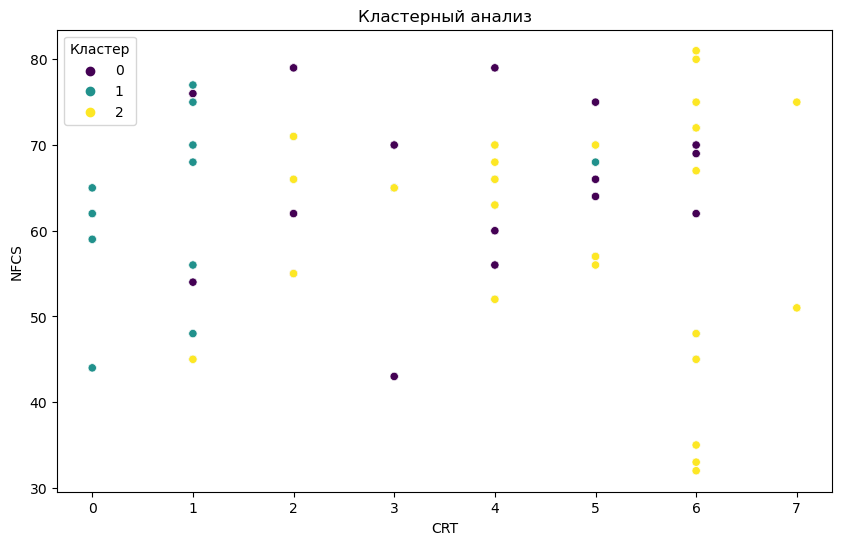

Кластер 0:
       Unnamed: 0     SBJ_ID        CRT       NFCS         CS  50_75_diff_AMP  \
count   38.000000  38.000000  38.000000  38.000000  38.000000       38.000000   
mean    26.736842  27.921053   3.736842  66.605263 -11.263158       -1.616636   
std     20.683829  20.783806   1.605467   9.454127  10.792100        2.668045   
min      0.000000   2.000000   1.000000  43.000000 -31.000000       -6.955040   
25%      8.250000  12.000000   2.250000  62.000000 -18.750000       -3.255070   
50%     23.000000  27.000000   4.000000  67.500000 -11.500000       -2.316773   
75%     48.750000  40.750000   5.000000  75.000000  -4.000000        0.370256   
max     59.000000  76.000000   6.000000  79.000000  11.000000        3.944459   

       Persuasiveness    Sharing  Congruence  Authoritativeness      Trust  \
count       38.000000  38.000000   38.000000          38.000000  38.000000   
mean         2.552632   2.342105    3.078947           2.368421   2.131579   
std          1.107648   1

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('EEG_001.csv')

# Замена запятых на точки в переменной 50_75_diff_AMP
data['50_75_diff_AMP'] = data['50_75_diff_AMP'].str.replace(',', '.').astype(float)

# Преобразование категориальных переменных в числовые с помощью one-hot кодирования
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_features = encoder.fit_transform(data[['Attitude', 'Speaker']])
categorical_feature_names = encoder.get_feature_names_out(['Attitude', 'Speaker'])

# Объединение численных и закодированных категориальных признаков
numerical_features = data[['CRT', 'NFCS', 'CS', 'Persuasiveness', 'Sharing', 'Congruence', 'Authoritativeness', 'Trust', '50_75_diff_AMP']]
features = pd.concat([numerical_features, pd.DataFrame(categorical_features, columns=categorical_feature_names)], axis=1)

# Стандартизация данных
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Кластеризация с использованием KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
data['Cluster'] = clusters

# Визуализация результатов
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='CRT', y='NFCS', hue='Cluster', palette='viridis')
plt.title('Кластерный анализ')
plt.xlabel('CRT')
plt.ylabel('NFCS')
plt.legend(title='Кластер')
plt.show()

# Интерпретация результатов
for cluster in range(kmeans.n_clusters):
    print(f"Кластер {cluster}:")
    print(data[data['Cluster'] == cluster].describe())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 31, ncost: 17714.35596225574
Run: 1, iteration: 2/100, moves: 10, ncost: 17215.36042844109
Run: 1, iteration: 3/100, moves: 3, ncost: 17160.716071556242
Run: 1, iteration: 4/100, moves: 0, ncost: 17160.716071556242
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 24, ncost: 17687.162617771923
Run: 2, iteration: 2/100, moves: 11, ncost: 17134.086777991397
Run: 2, iteration: 3/100, moves: 5, ncost: 17000.750312491837
Run: 2, iteration: 4/100, moves: 1, ncost: 16994.385440965296
Run: 2, iteration: 5/100, moves: 0, ncost: 16994.385440965296
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 13, ncost: 17027.311328842865
Run: 3, iteration: 2/100, moves: 2, ncost: 16995.555561438217

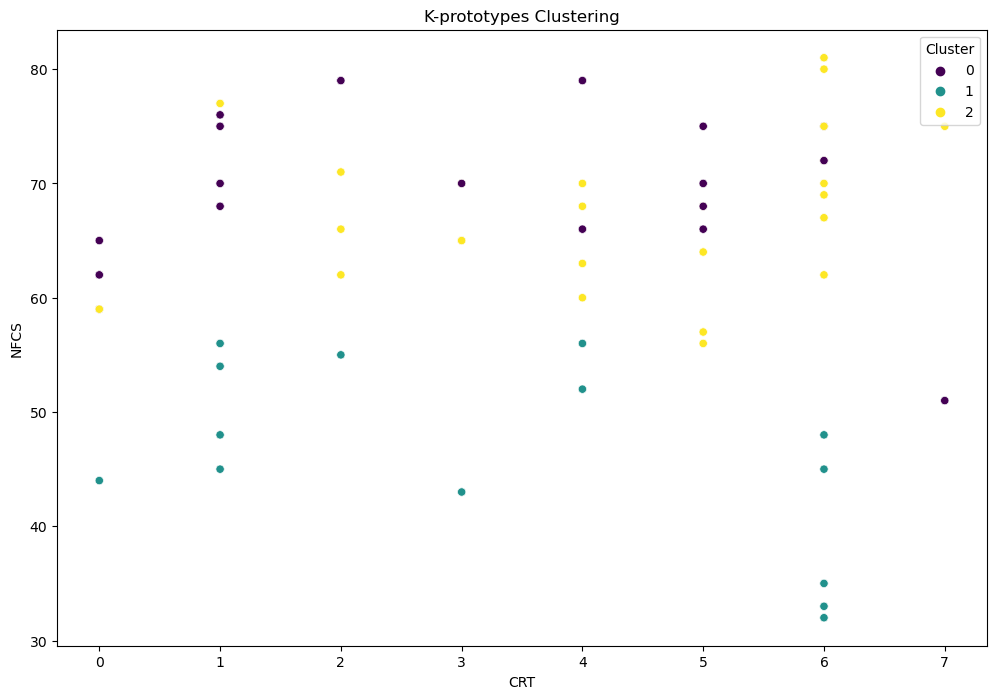

Cluster 0:
        Unnamed: 0     SBJ_ID   Attitude PROCENKO_AMP_E PROCENKO_AMP_C  \
count    42.000000  42.000000  42.000000             42             42   
unique         NaN        NaN        NaN             42             42   
top            NaN        NaN        NaN   -2,079298155   -1,029947333   
freq           NaN        NaN        NaN              1              1   
mean     32.238095  38.190476   0.476190            NaN            NaN   
std      19.628016  24.891215   0.505487            NaN            NaN   
min       0.000000   2.000000   0.000000            NaN            NaN   
25%      18.000000  18.000000   0.000000            NaN            NaN   
50%      35.000000  36.000000   0.000000            NaN            NaN   
75%      48.000000  55.000000   1.000000            NaN            NaN   
max      62.000000  77.000000   1.000000            NaN            NaN   

            diff_amp        CRT       NFCS         CS    Speaker  ...  \
count             42  42.00

In [1]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных из файла
df = pd.read_csv('EEG_001.csv')

# Замена запятых на точки в переменной '50_75_diff_AMP'
df['50_75_diff_AMP'] = df['50_75_diff_AMP'].str.replace(',', '.').astype(float)

# Выбор категориальных и числовых переменных
categorical_columns = ['Attitude', 'Speaker']
numerical_columns = ['CRT', 'NFCS', 'CS', 'Persuasiveness', 'Sharing', 'Congruence', 
                     'Authoritativeness', 'Trust', '50_75_diff_AMP']

# Преобразование категориальных данных в числовые индексы
for column in categorical_columns:
    df[column] = df[column].astype('category').cat.codes

# Подготовка данных для модели
data = df[categorical_columns + numerical_columns].values

# Инициализация и обучение модели K-prototypes
kproto = KPrototypes(n_clusters=3, init='Cao', n_init=5, verbose=1)
clusters = kproto.fit_predict(data, categorical=[0, 1])

# Добавление информации о кластере в DataFrame
df['Cluster'] = clusters

# Визуализация результатов
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='CRT', y='NFCS', hue='Cluster', palette='viridis')
plt.title('K-prototypes Clustering')
plt.xlabel('CRT')
plt.ylabel('NFCS')
plt.legend(title='Cluster')
plt.show()

# Интерпретация результатов
for cluster in sorted(df['Cluster'].unique()):
    print(f"Cluster {cluster}:")
    cluster_data = df[df['Cluster'] == cluster]
    print(cluster_data.describe(include='all'))
    print("\n")

In [21]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.
